## House Prices - Advanced Regression Techniques

Problem Statement: Your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#

In [44]:
# Import 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option("display.max_columns" , None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [45]:
# Data-set
train_df = pd.read_csv("/Users/krushna/Downloads/house-prices-advanced-regression-techniques-2/train.csv")

In [46]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [47]:
# Missing Values
# Number of features with missing values 
features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1]

#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.1774 %
Alley = 0.9377 %
MasVnrType = 0.5973 %
MasVnrArea = 0.0055 %
BsmtQual = 0.0253 %
BsmtCond = 0.0253 %
BsmtExposure = 0.026 %
BsmtFinType1 = 0.0253 %
BsmtFinType2 = 0.026 %
FireplaceQu = 0.4726 %
GarageType = 0.0555 %
GarageYrBlt = 0.0555 %
GarageFinish = 0.0555 %
GarageQual = 0.0555 %
GarageCond = 0.0555 %
PoolQC = 0.9952 %
Fence = 0.8075 %
MiscFeature = 0.963 %


#

Since we know there are missig values, Now we will find how these missing values are related to Target variable 

#

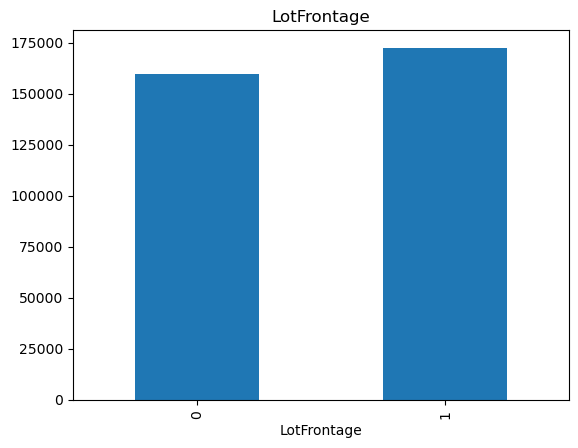

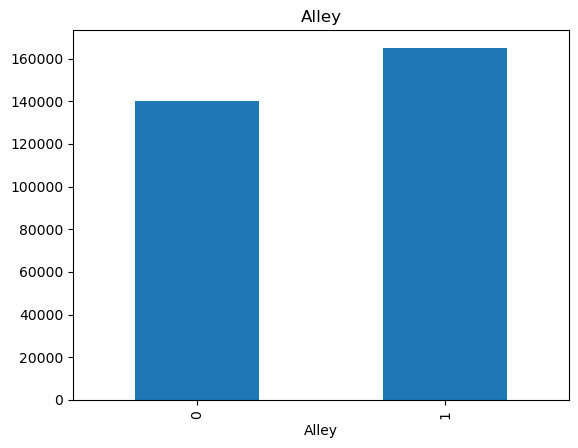

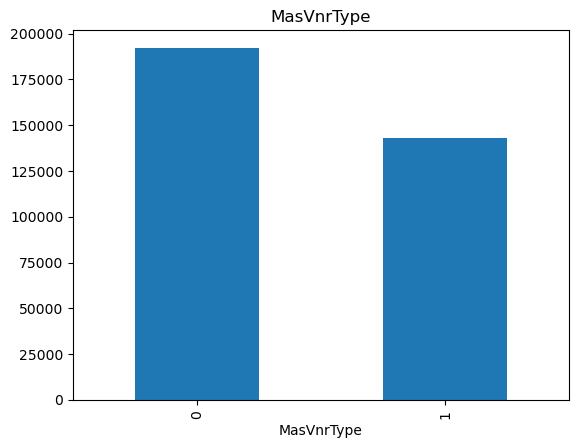

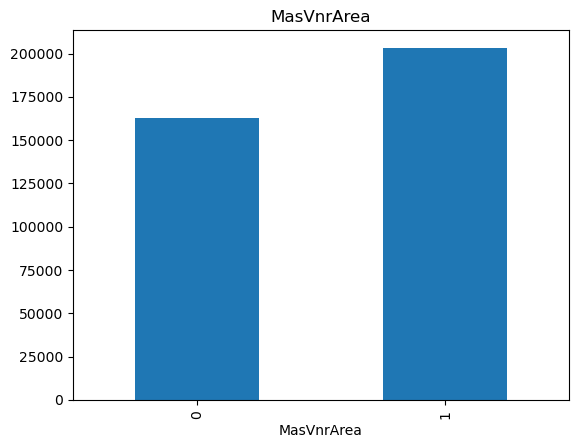

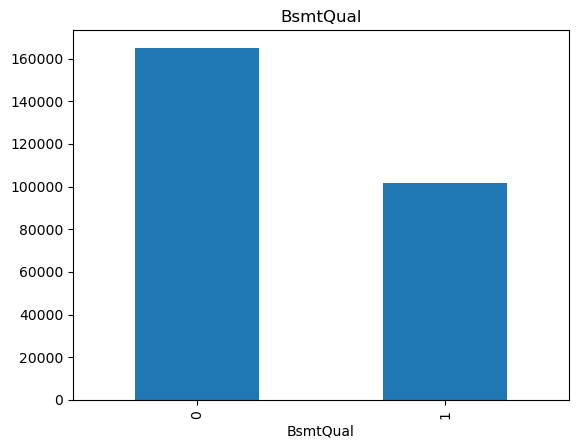

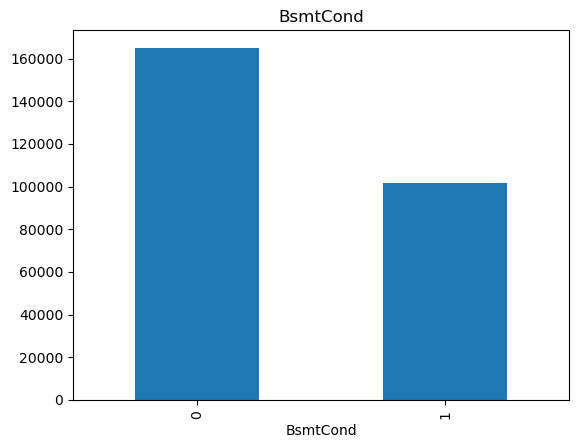

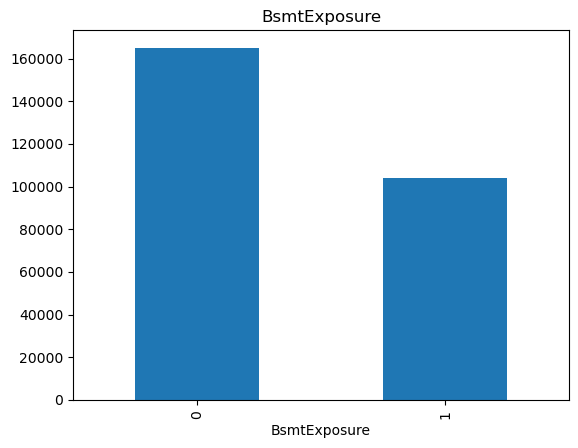

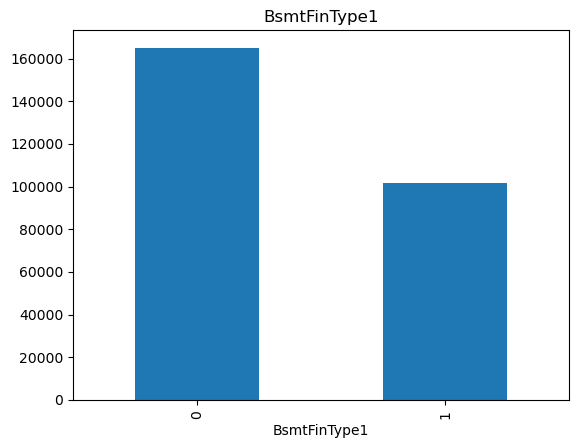

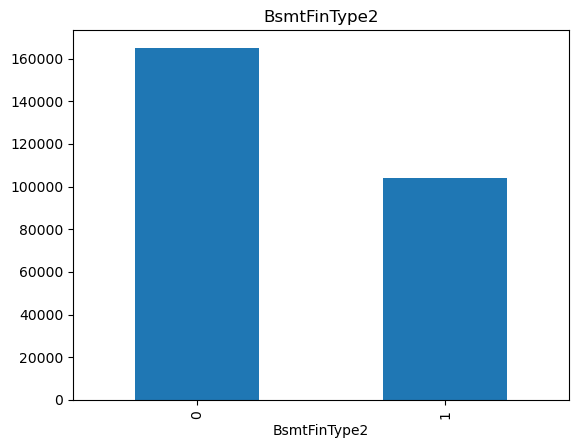

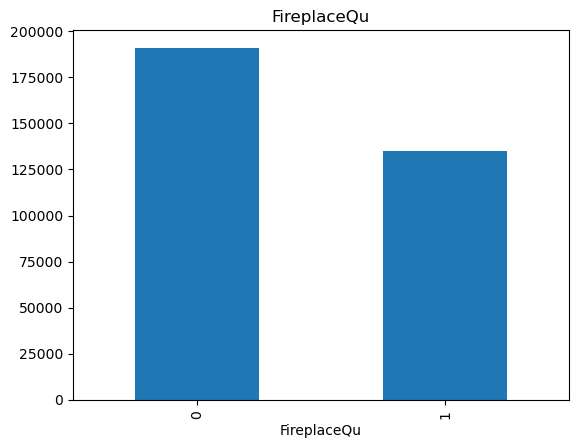

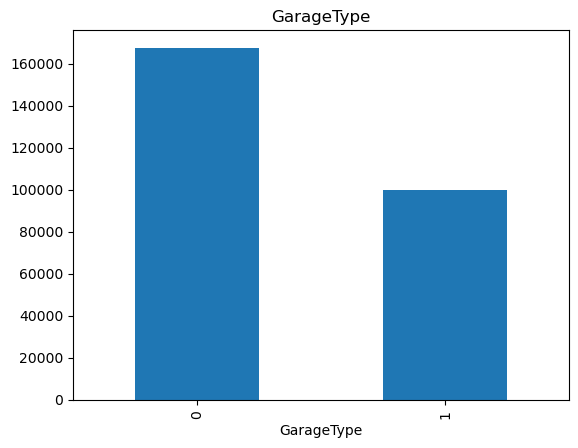

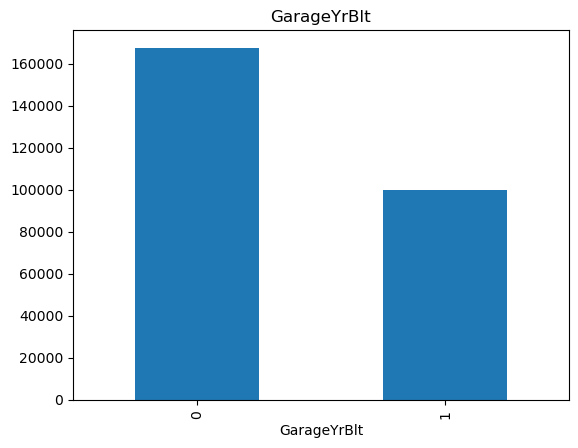

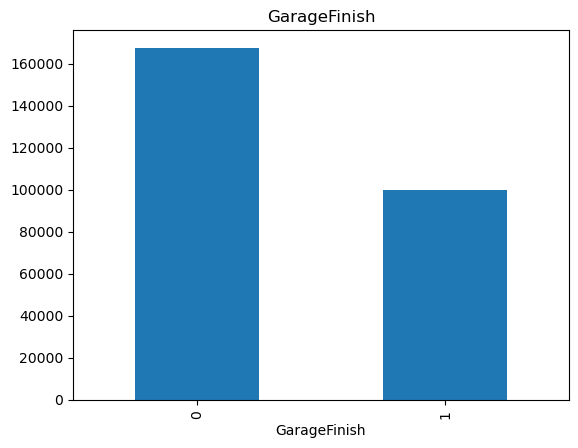

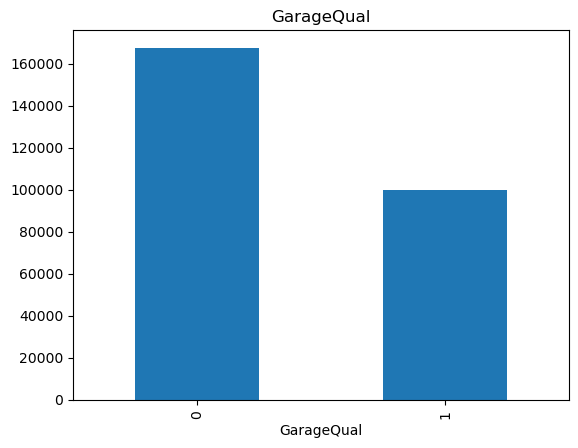

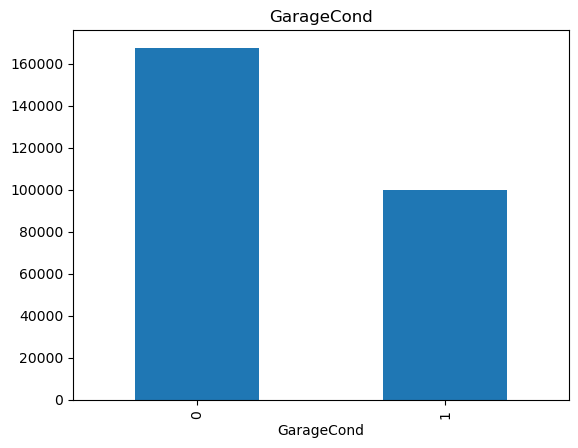

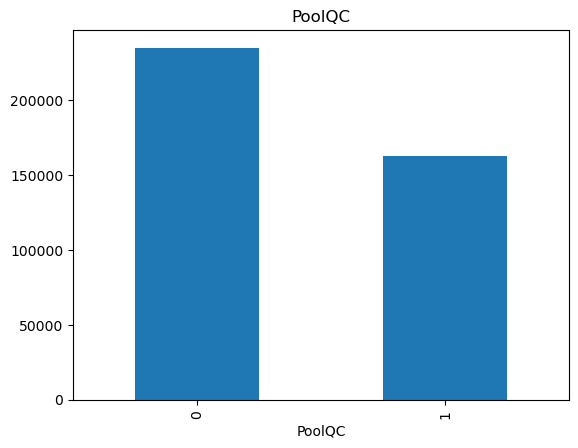

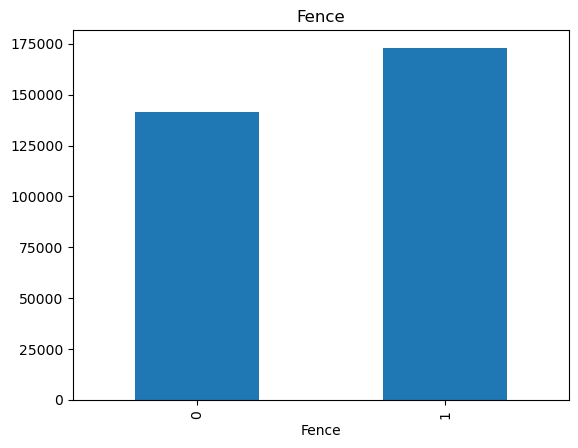

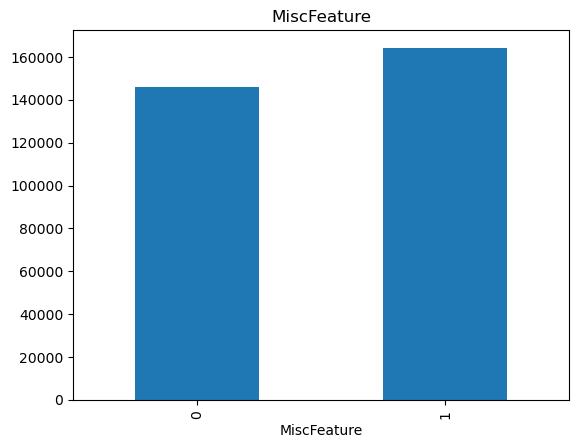

In [48]:
for features in features_with_null_values:
    data = train_df.copy()
    
    # if the data values are missing then indicate 1 
    # else 0
    data[features] = np.where(data[features].isnull(), 1, 0)
    
    # let's calculate the mean salesprice where the information is missing 
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

#

All these missing features are playing their role in predicitng SalesPrice. But these idea somwhat failed me to get the best visualize of my data. Therefore, let's make scatter plot.

#

In [49]:
# Numerical Variables 
numerical_features = [features for features in train_df.columns if train_df[features].dtypes != 'O']
print("Numerical Features = " ,len(numerical_features))

train_df[numerical_features].head()

Numerical Features =  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Now we have total of 38 cols with numerical values. Let's settle DateTime cols.

DateTime can we done by differentiating with year based columns, finding unique values inside and visualize btw particular year and sales price

#

In [50]:
# Date Time Variables
year_features = [features for features in numerical_features if 'Yr' in features or 'Year'in features]
print(year_features,"\n")

for features in year_features:
    print(features, train_df[features].unique())
    print("\n")

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998.

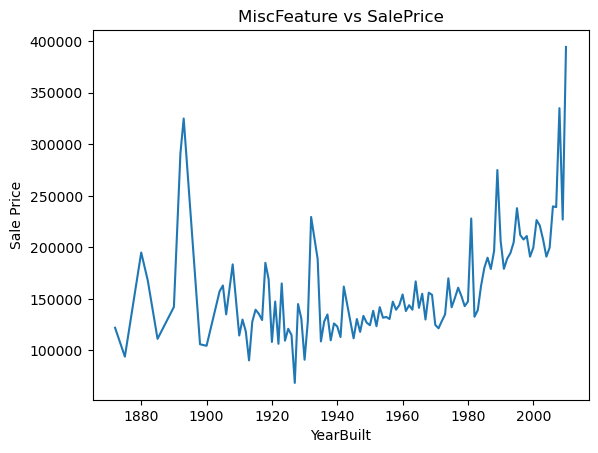

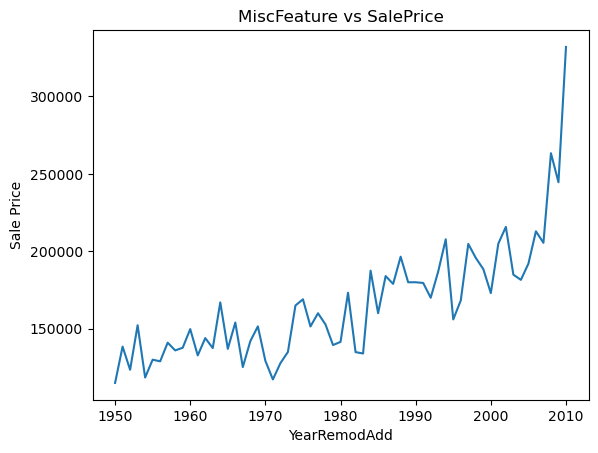

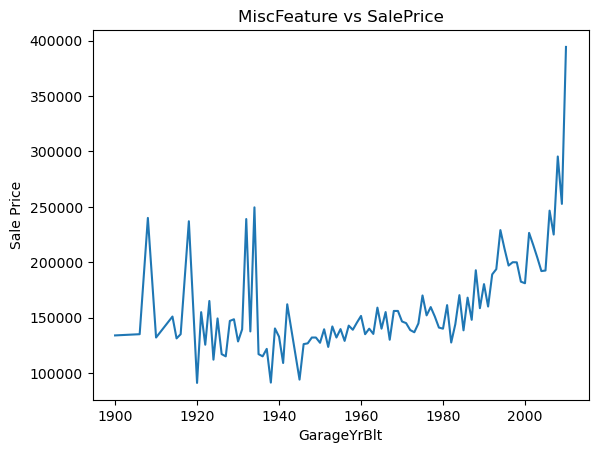

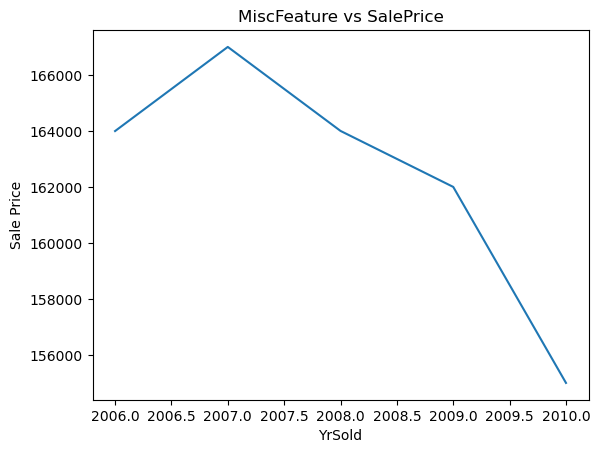

In [51]:
# Plotting 

for features in year_features:
    
    data  = train_df.copy()
    data.groupby(features)['SalePrice'].median().plot()
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.title(feature + " vs SalePrice") 
    plt.show()

From this we can see that the YrSold plays a great role in this dataset and from this we came to a point where, year Sold must be playing upside down rather than reality. As price is increasing as years are passing so sales price are dropping. To digest, this let's see house's birth date or year lived and changes with sales Price 

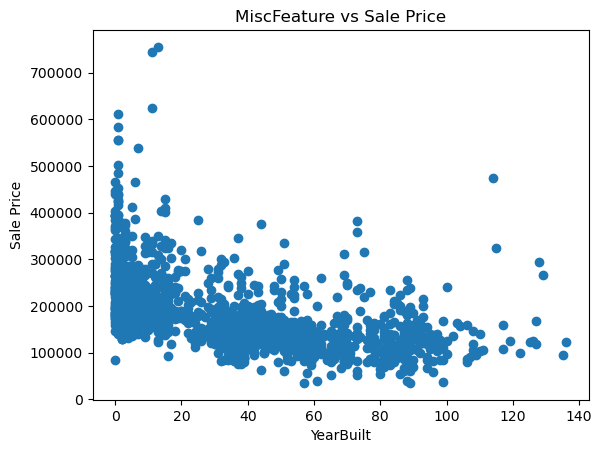

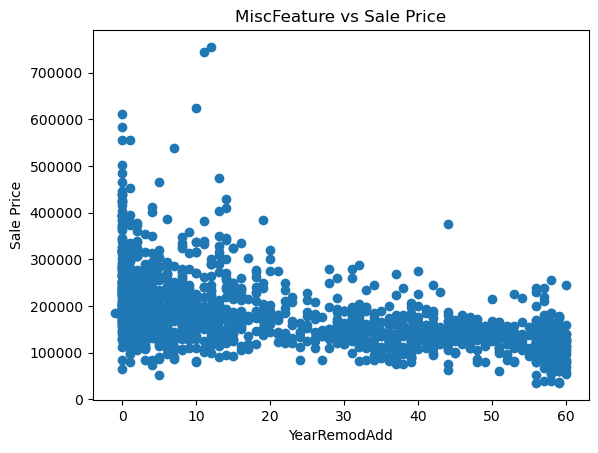

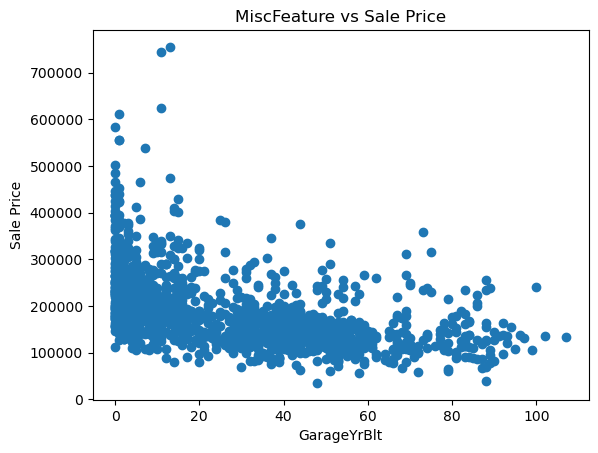

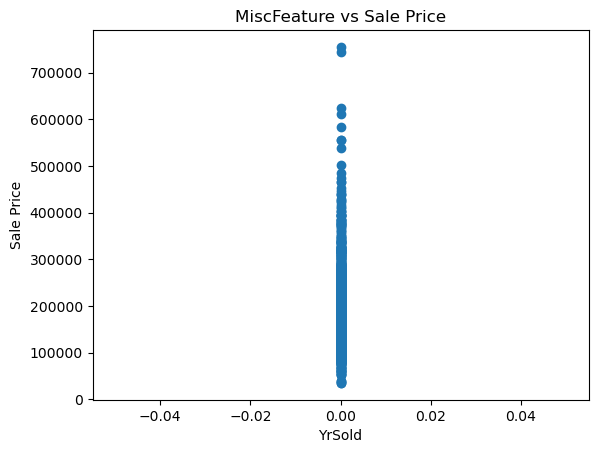

In [52]:
# Plotting House Lived and Sales Price

for features in year_features:
    data3 = train_df.copy()
    data3[features] = data3['YrSold'] - data3[features]
    
    plt.scatter(data3[features],data3['SalePrice'])
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.title(feature + ' vs Sale Price')
    plt.show()

    Conclude: As the years Build increases, the salePrice is dropped

              As the years renovated moves, the Sales Price drops

              As the garage gets older, the Sales Proce is dropped 

#

In [53]:
# Numerical Feature 
# Two Types: Discrete and Continous 
# Lets check how discrete make a change to Sales Price

descrete_features = [features for features in numerical_features if len(train_df[features].unique())<25 and features not in year_features +['Id']]
print("Total descrete_features: " , len(descrete_features))

Total descrete_features:  17


In [54]:
train_df[descrete_features].tail()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
1455          60            6            5             0             0   
1456          20            6            6             0             1   
1457          70            7            9             0             0   
1458          20            5            6             0             1   
1459          20            5            6             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
1455             7           1           2          0         0        0   
1456             7           2           2          0         0        0   
1457             9           2           1          0         0     2500   
1458             5           0           1          0         0        0   
1459             6           0           1          0         0        0   

      MoSold  
1455       8  
1456       2  
1457       5  
1458       4  
1459       6

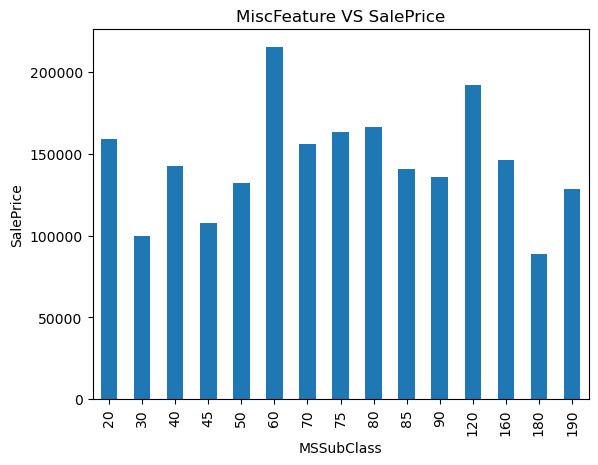

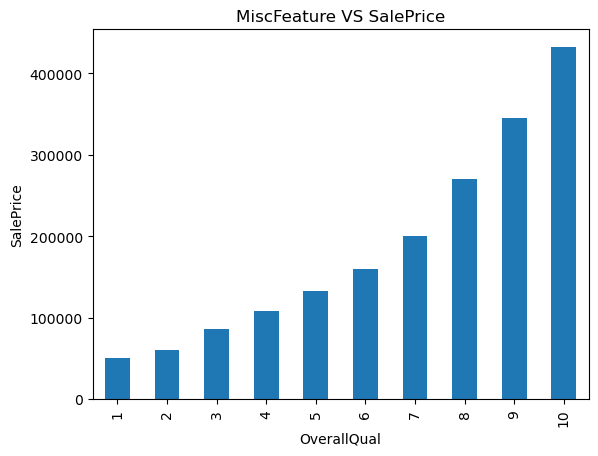

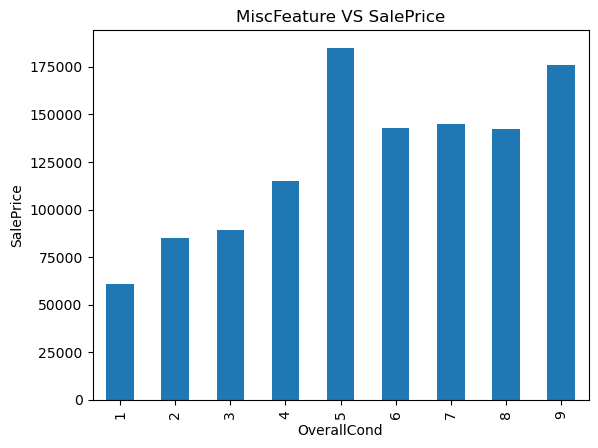

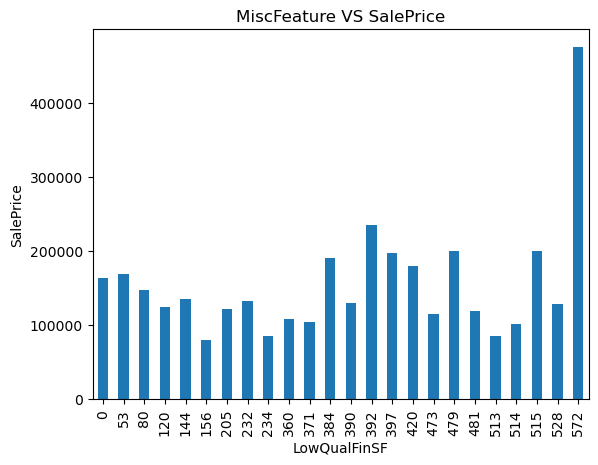

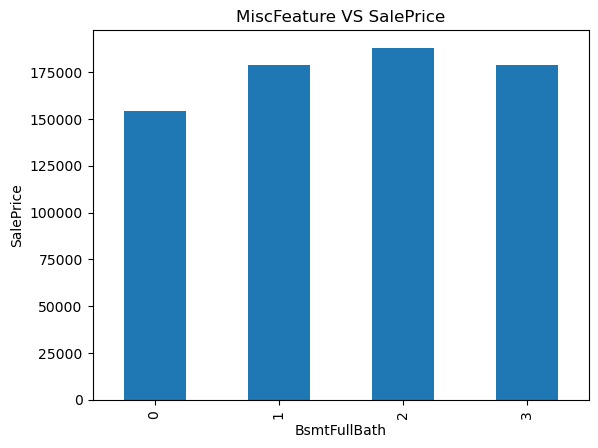

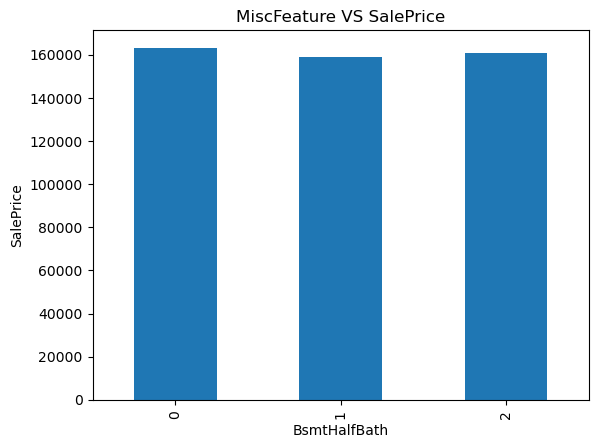

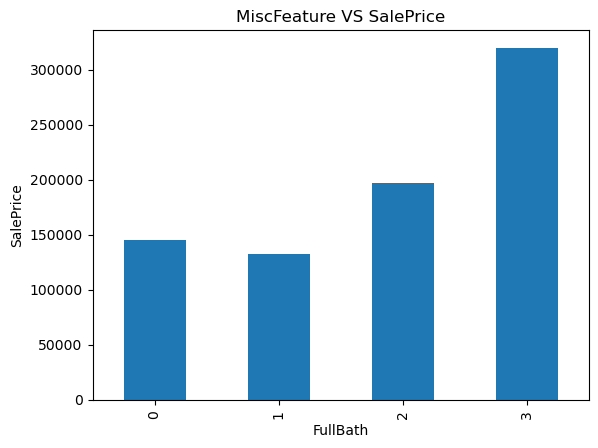

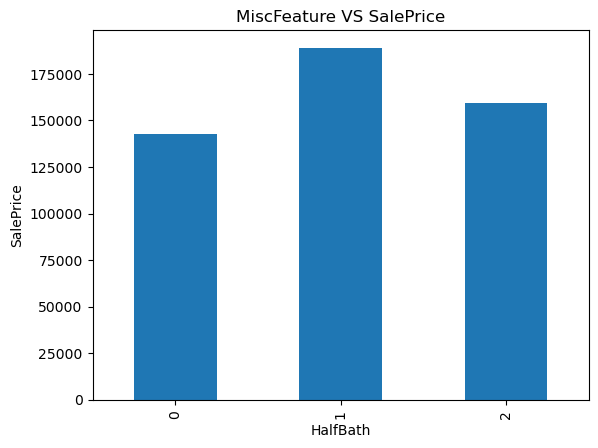

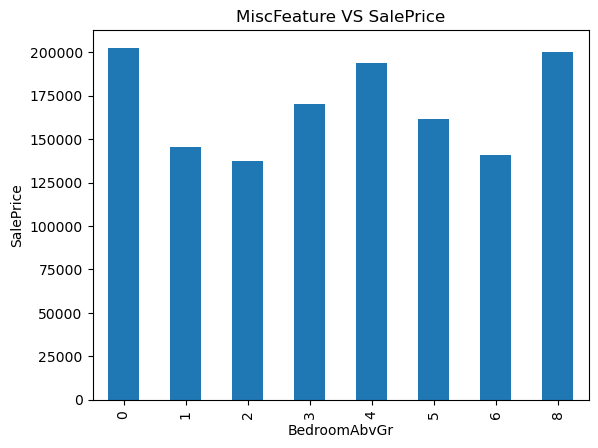

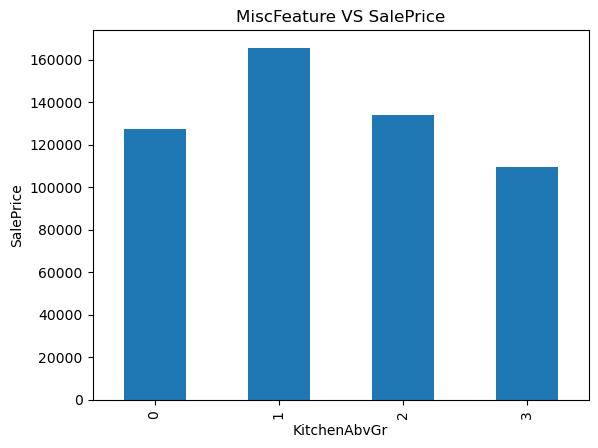

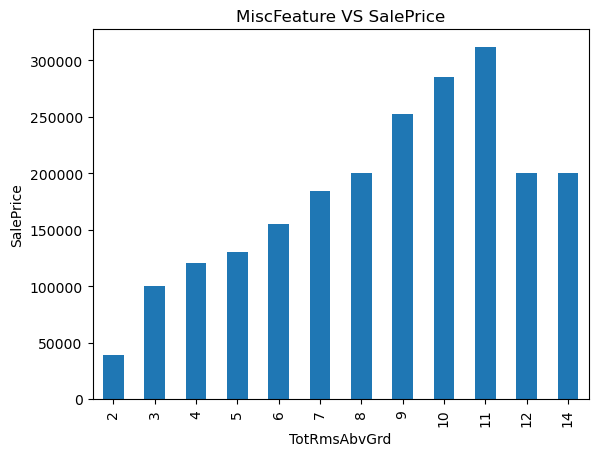

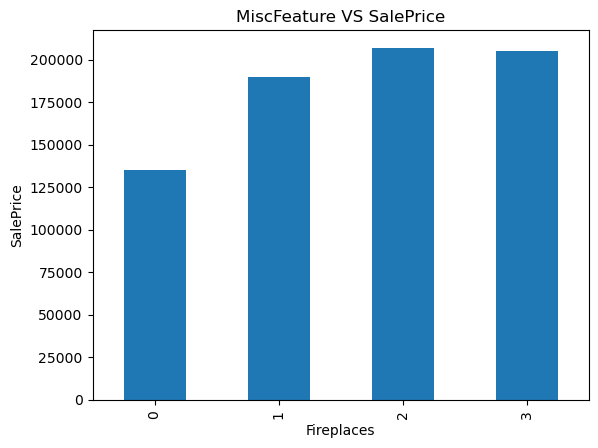

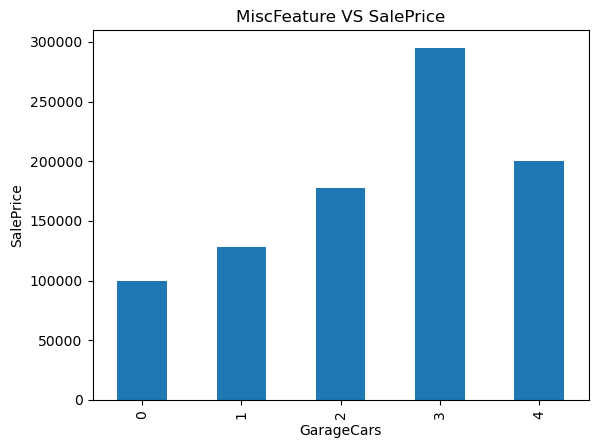

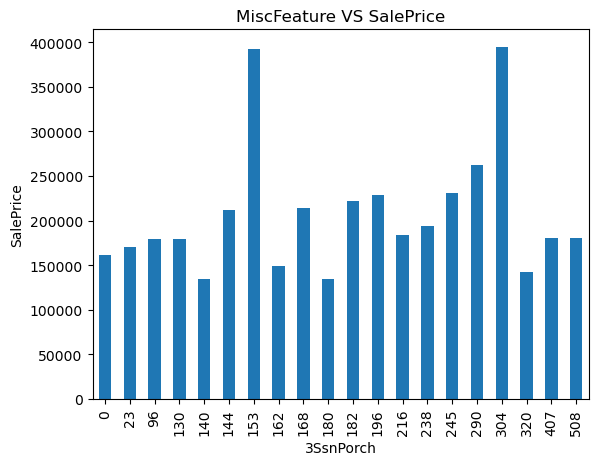

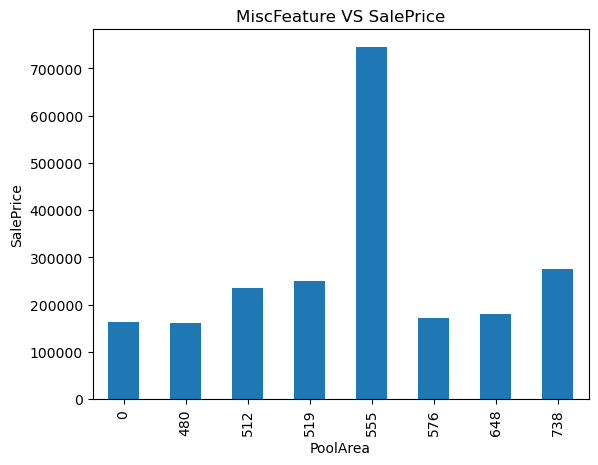

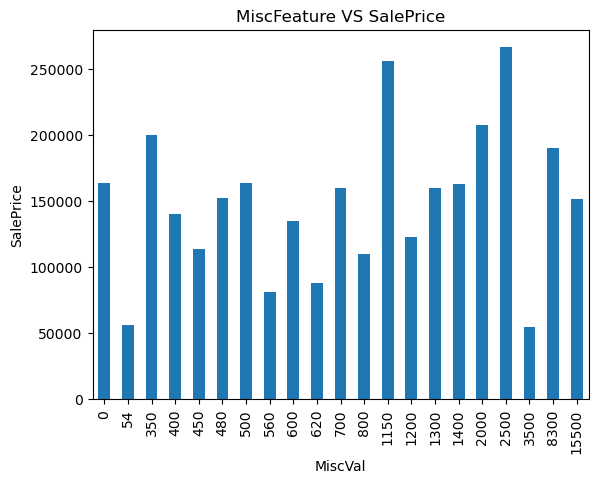

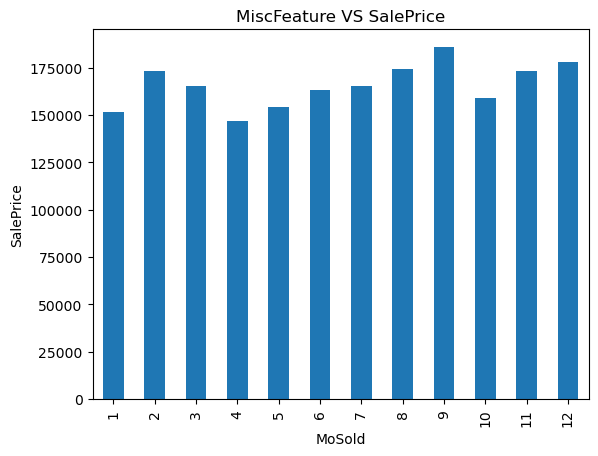

In [55]:
# Plotting 

for features in descrete_features:
    data4 = train_df.copy()
    data4.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(feature + ' VS SalePrice')
    plt.show()

    Conclude: As OverallQual increases, SalesPrice Increases
OverallQual: Rates the overall material and finish of the house

             In the end of LowQualFinSF, the SalePrice is highest
LowQualFinSF: Low quality finished square feet (all floors)

#

In [56]:
# Continous Varibale 
continous_feature = [features for features in numerical_features if features not in descrete_features+ year_features+['id']]
print("Total continous_features: " , len(continous_feature))

Total continous_features:  17


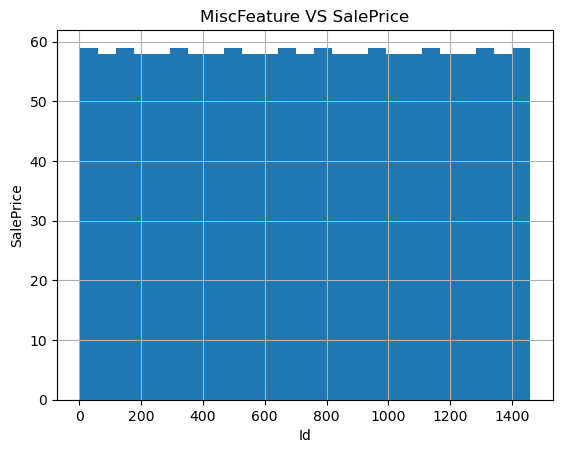

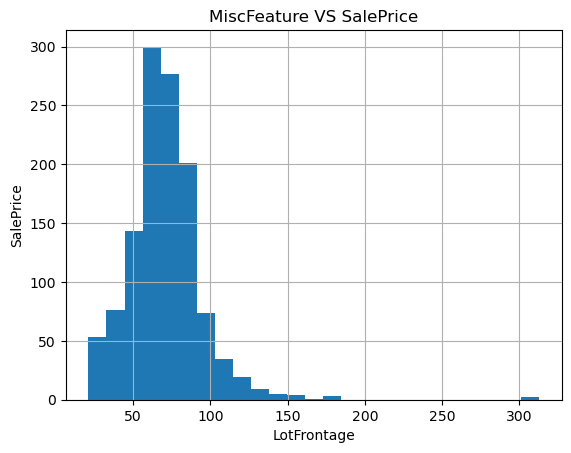

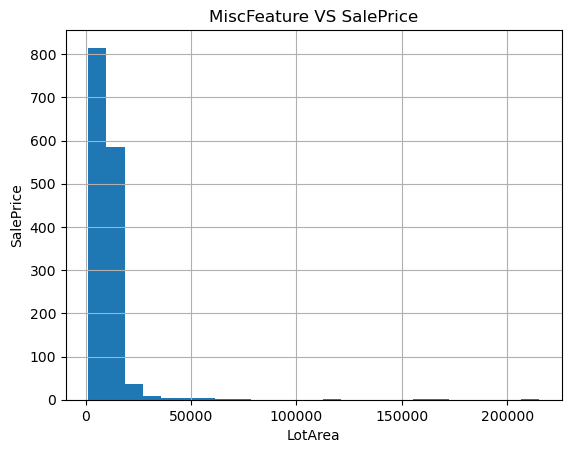

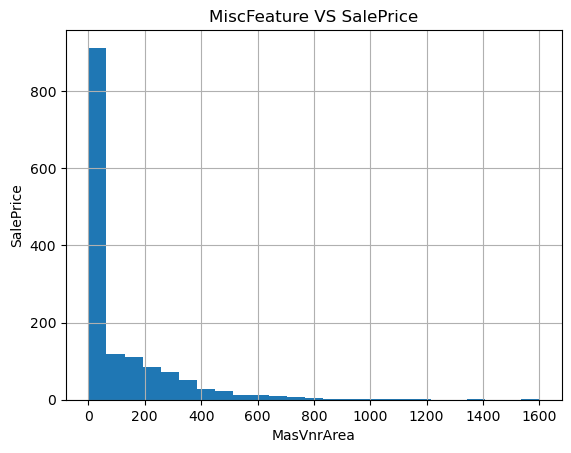

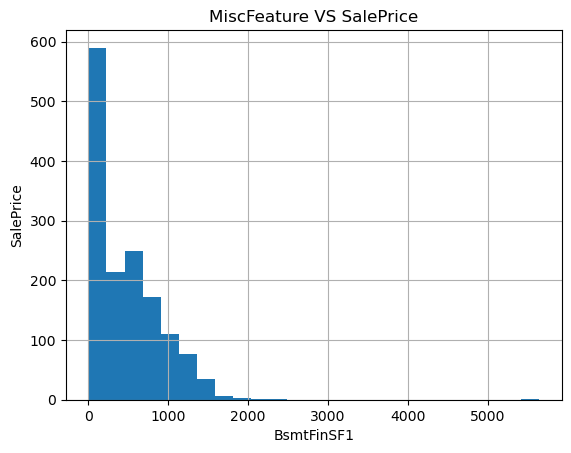

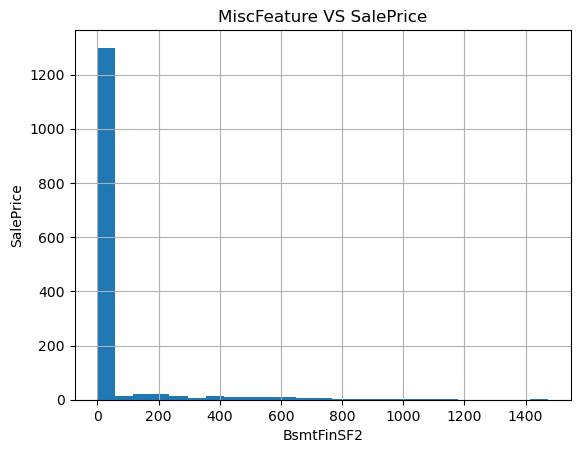

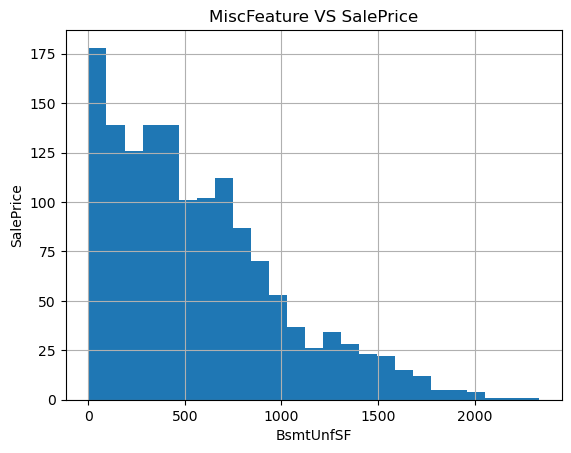

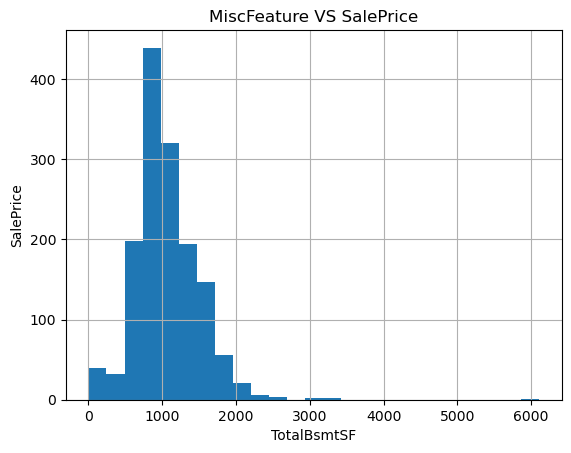

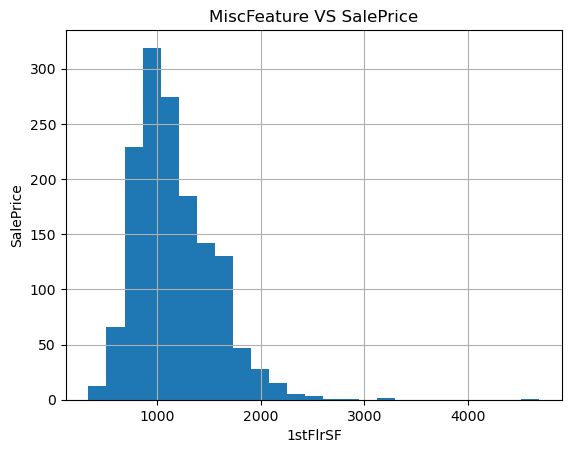

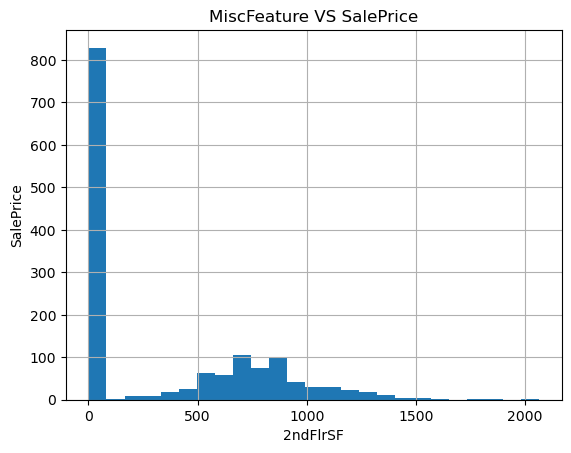

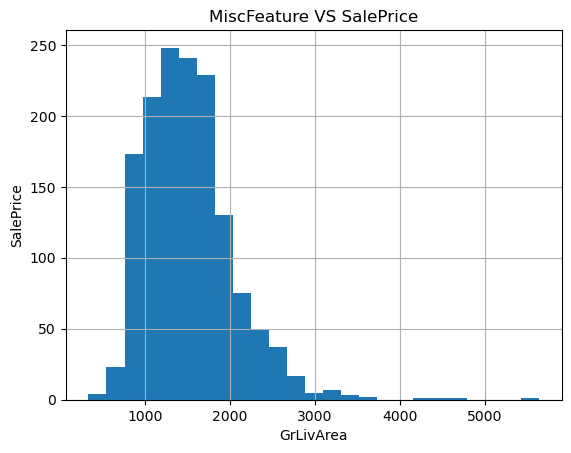

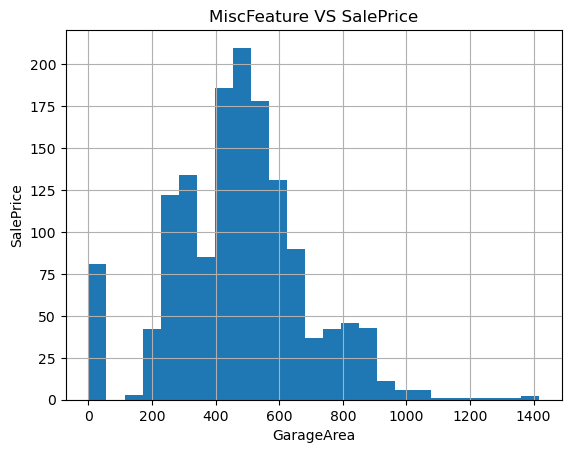

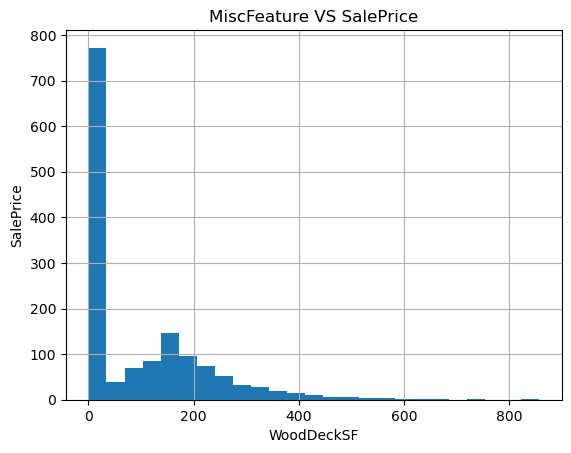

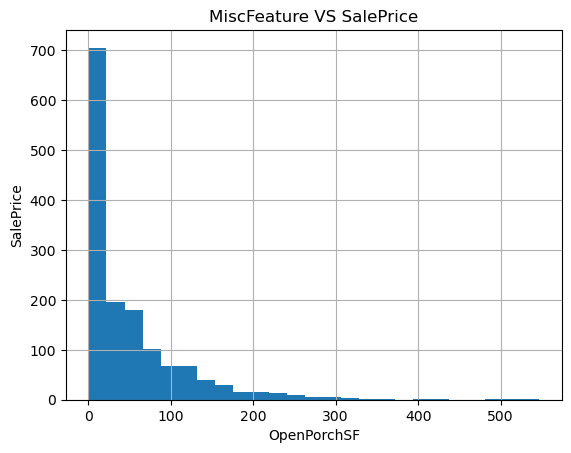

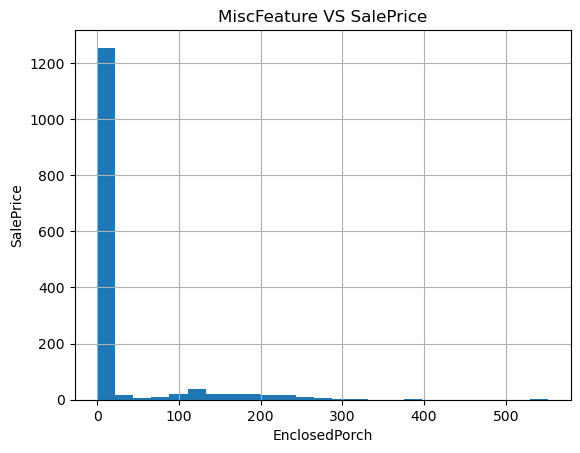

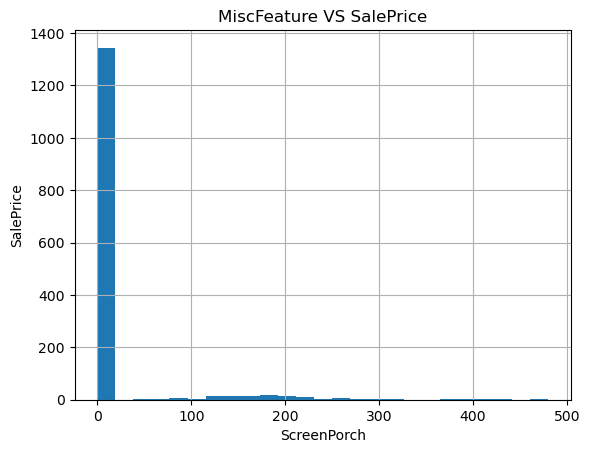

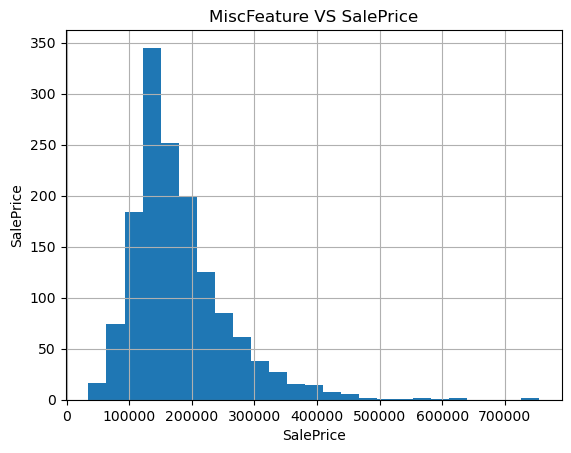

In [57]:
# Plotting for continous, we build histogram 

for features in continous_feature:
    data5 = train_df.copy()
    data5[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(feature + ' VS SalePrice')
    plt.show()

#

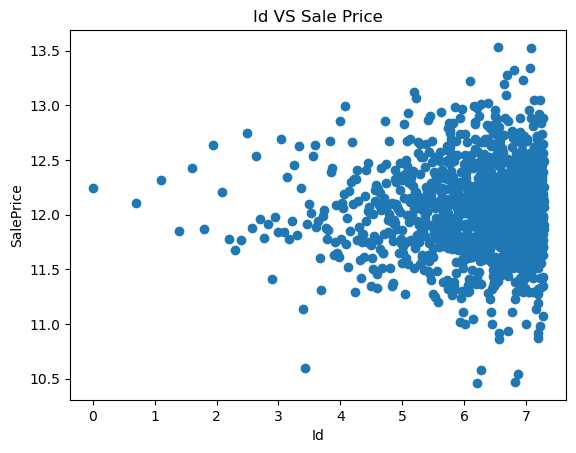

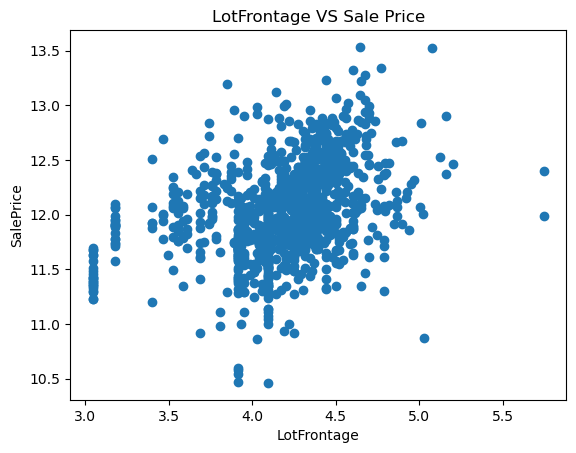

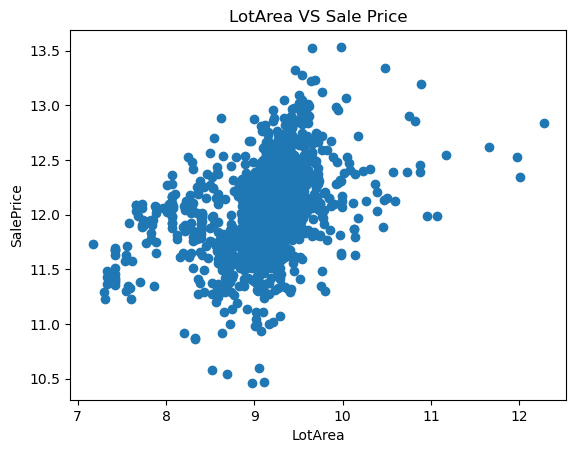

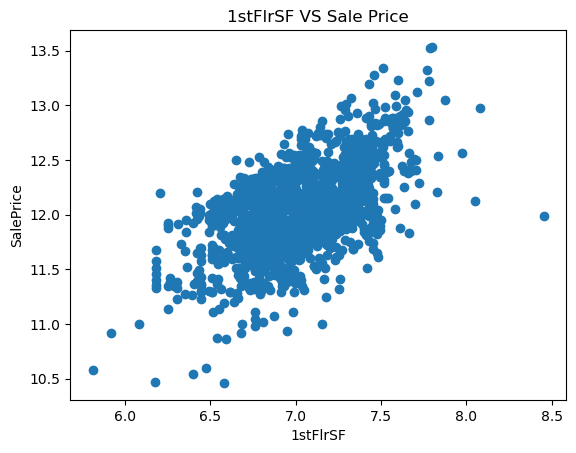

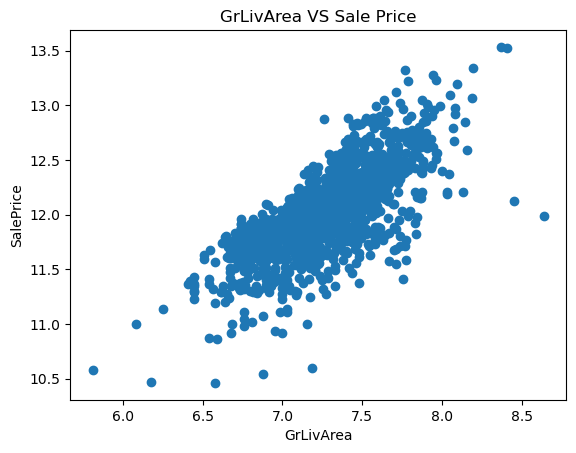

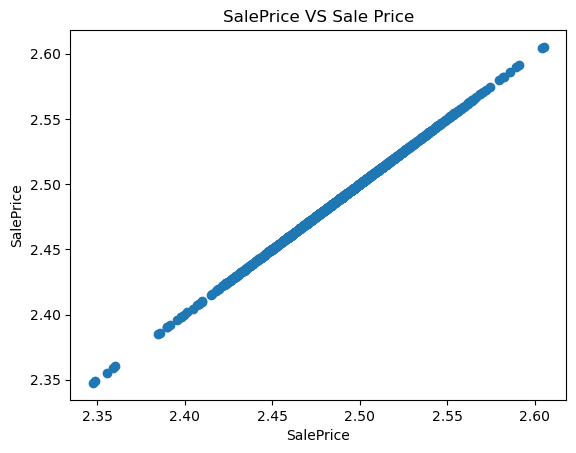

In [58]:
# Logarithmic Transformation for continous Feature

for features in continous_feature:
    data5 = train_df.copy()
    if 0 in data5[features].unique():
        pass
    else:
        data5[features] = np.log(data5[features])
        data5['SalePrice'] = np.log(data5['SalePrice'])
        plt.scatter(data5[features], data5['SalePrice'])
        plt.xlabel(features)
        plt.ylabel("SalePrice")
        plt.title(features + " VS Sale Price")
        plt.show()


    Conclude: All these features are sacled equally using logarihtm transformation

#

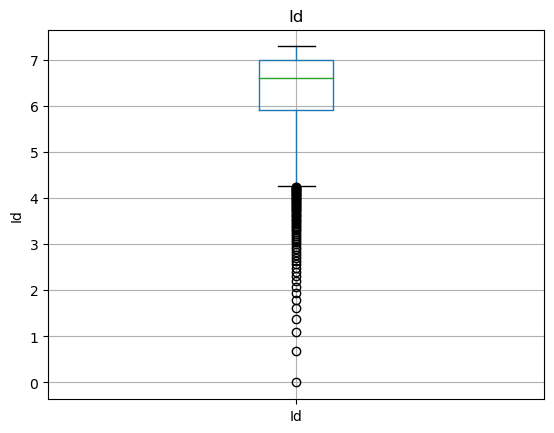

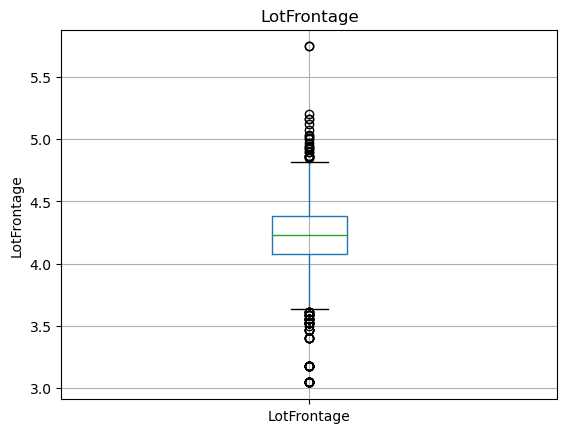

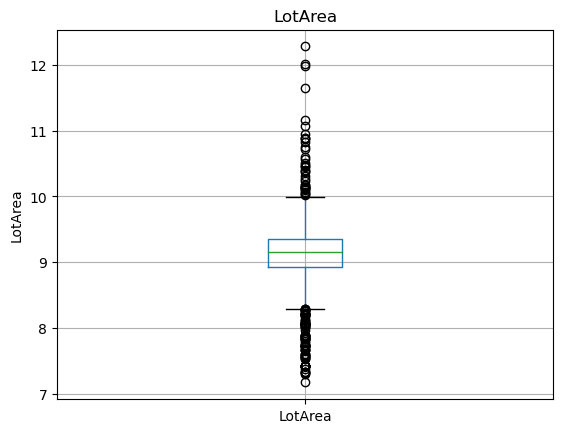

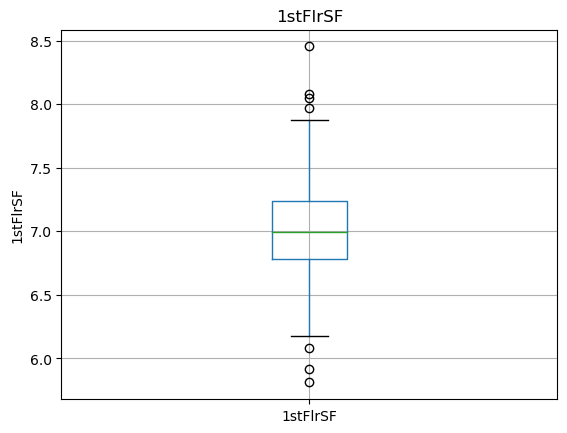

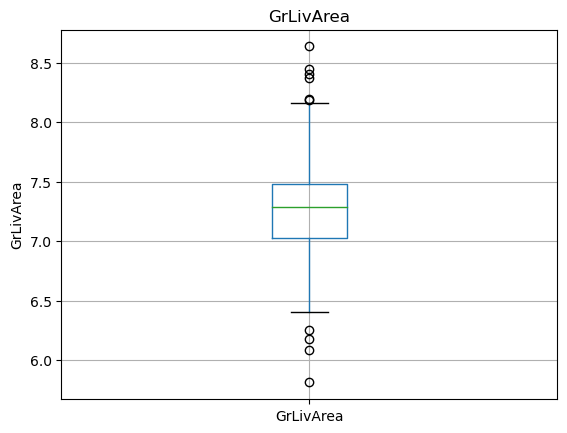

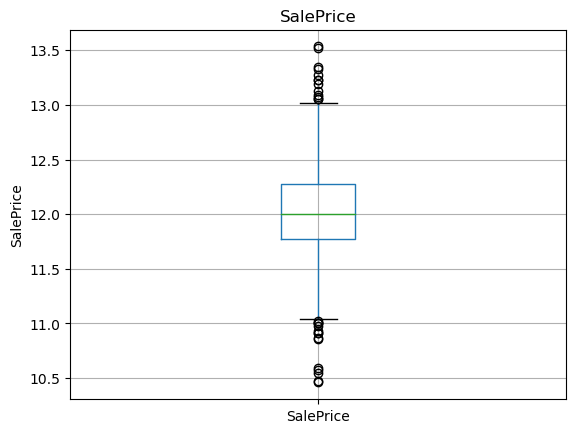

In [59]:
# Outlier - boxplot

for features in continous_feature:
    data5 = train_df.copy()
    if 0 in data5[features].unique():
        pass
    else:
        data5[features] = np.log(data5[features])
        data5.boxplot(column = features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

    Conclude: These are many outliers
   

#

In [60]:
# Categorical Features

categorical_features = [features for features in train_df.columns if train_df[features].dtypes == 'O']
train_df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [61]:
# Cardinalty- how many dfferent categories each features has

for feature in categorical_features:
    print("Unique values for", feature, ": ", train_df[feature].unique())
    print("\n")

Unique values for MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values for Street :  ['Pave' 'Grvl']


Unique values for Alley :  [nan 'Grvl' 'Pave']


Unique values for LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']


Unique values for LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']


Unique values for Utilities :  ['AllPub' 'NoSeWa']


Unique values for LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values for LandSlope :  ['Gtl' 'Mod' 'Sev']


Unique values for Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values for Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values for Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values for BldgType :  ['1Fam' '2fmCon' 'Duplex' 'Twnhs

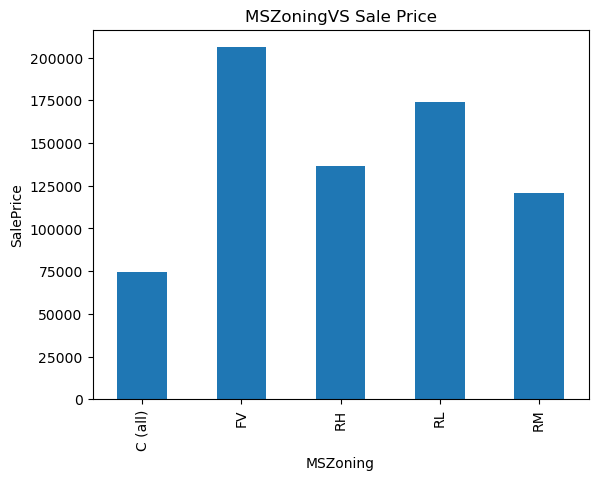

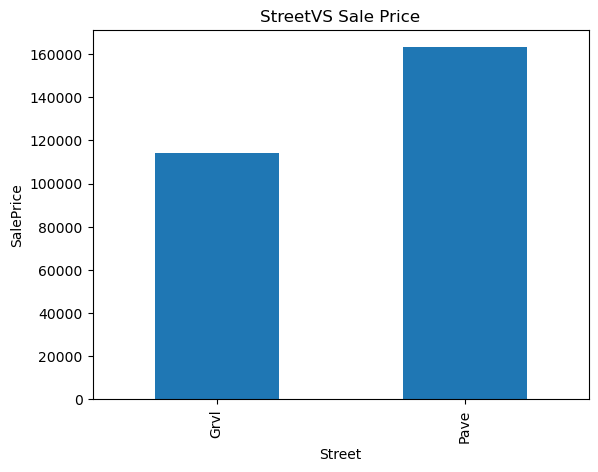

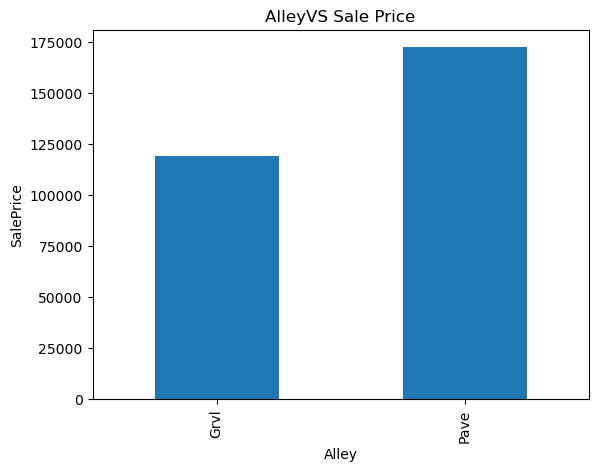

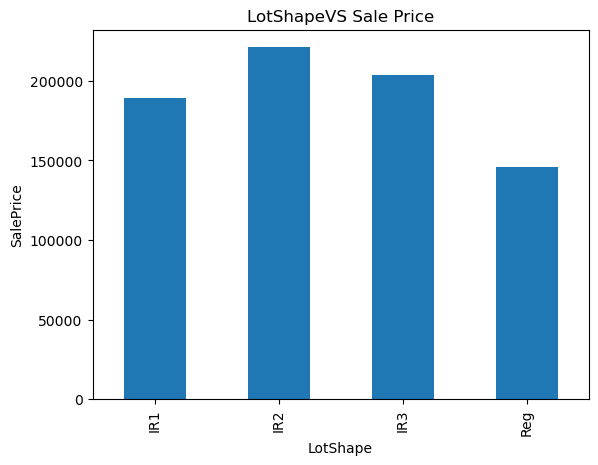

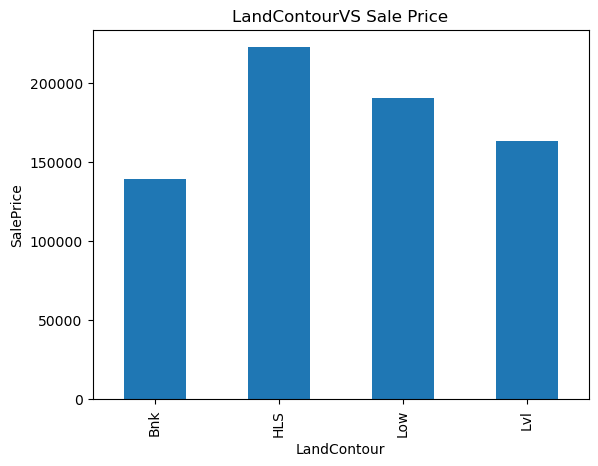

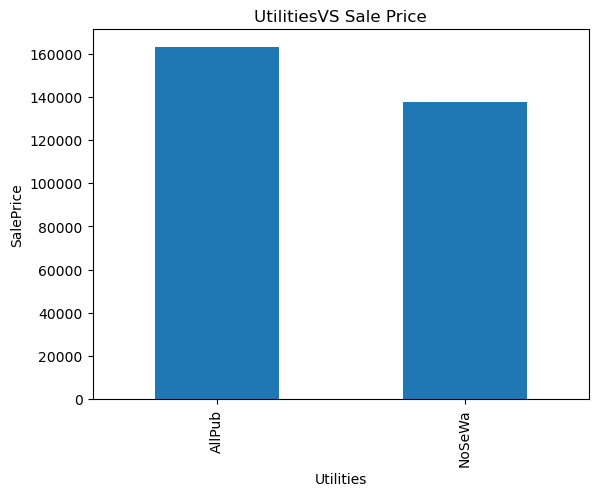

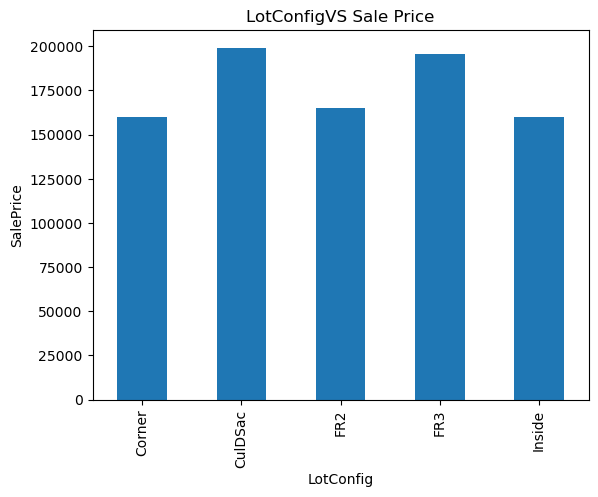

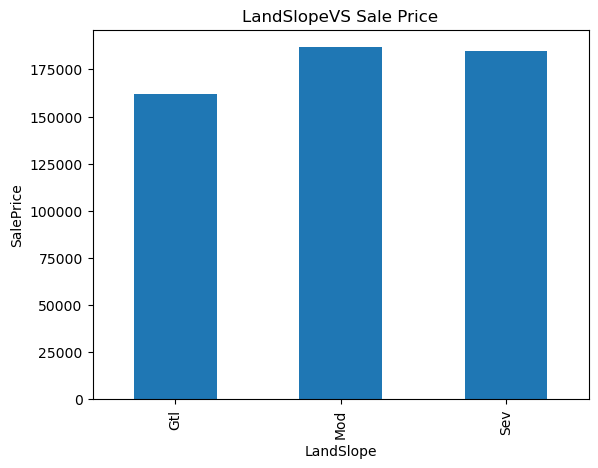

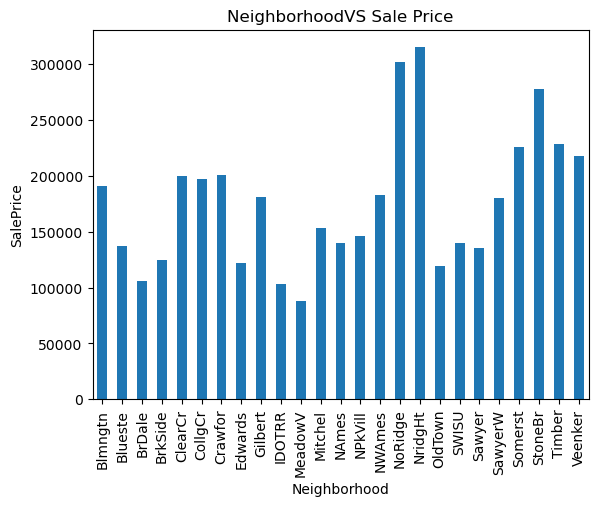

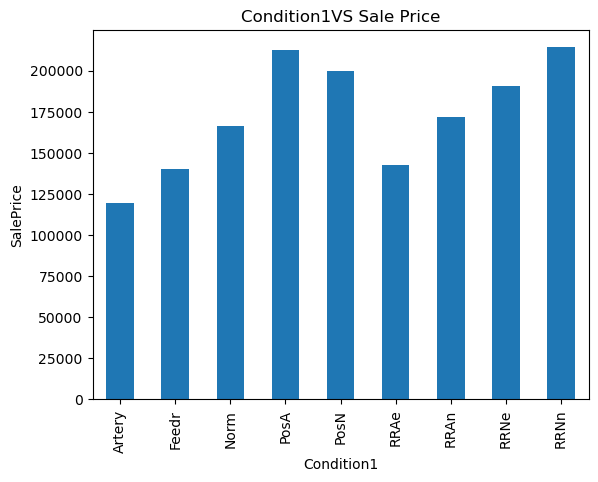

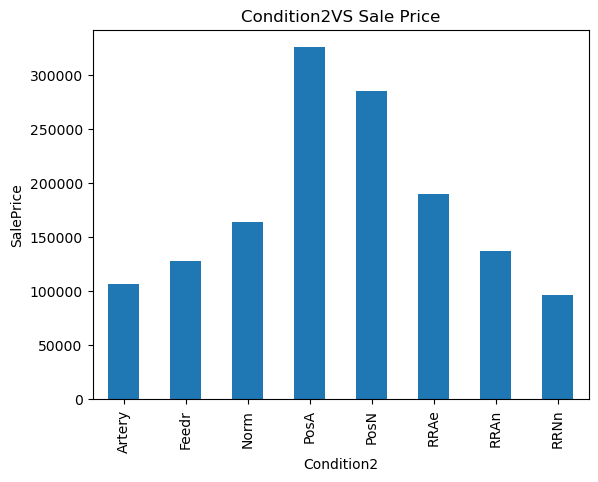

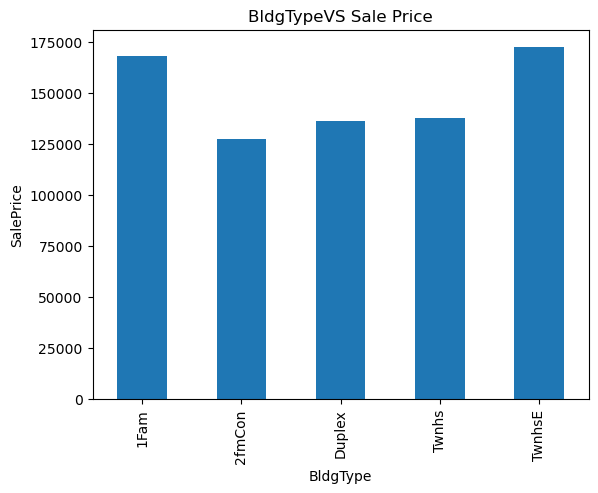

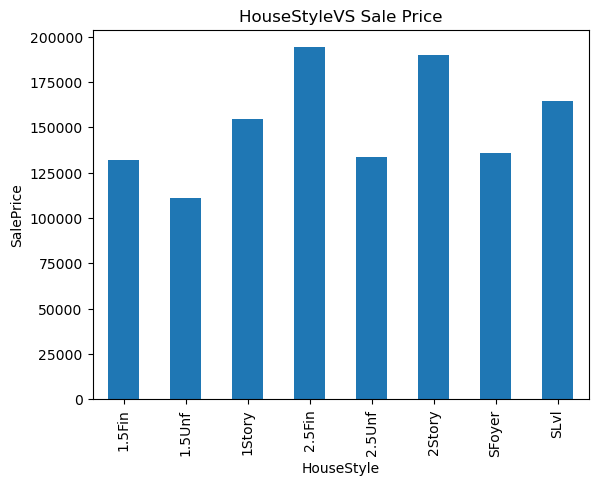

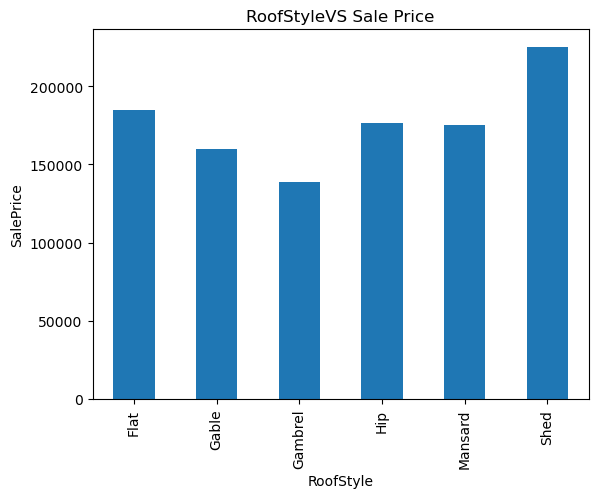

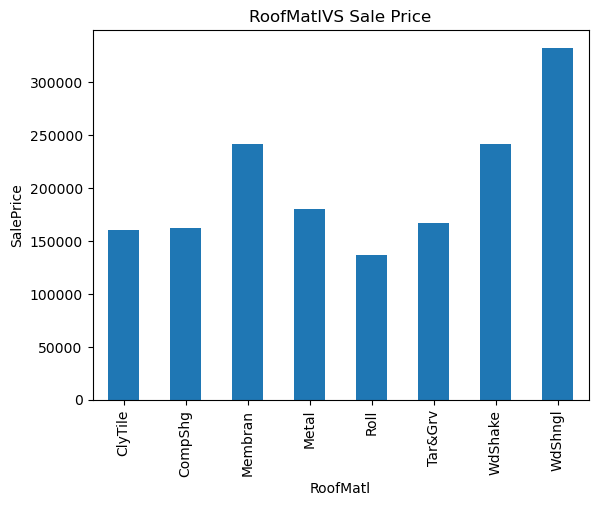

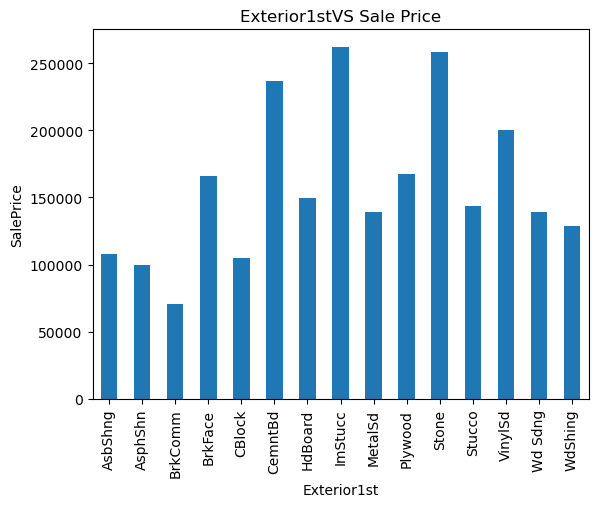

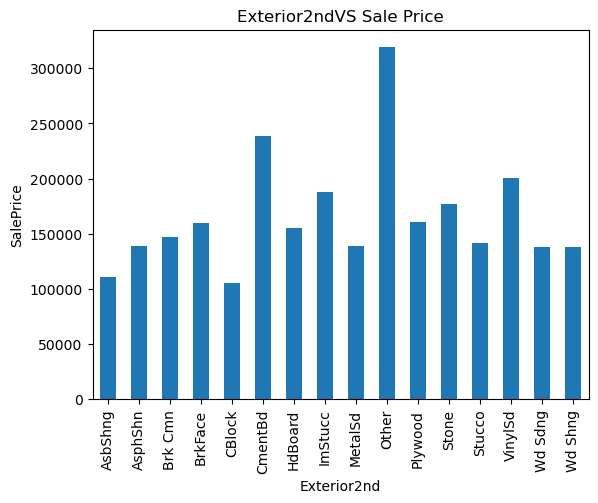

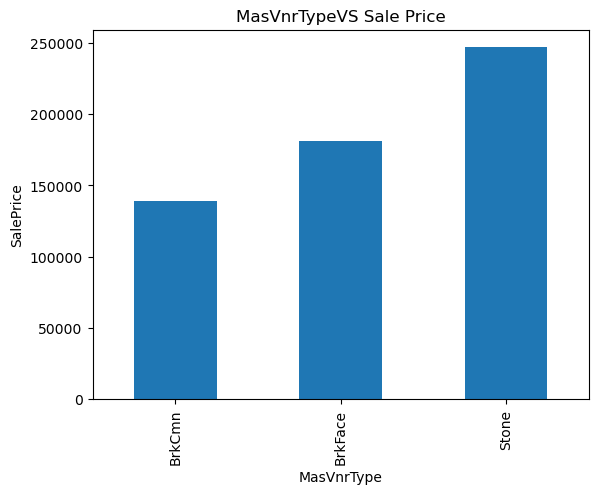

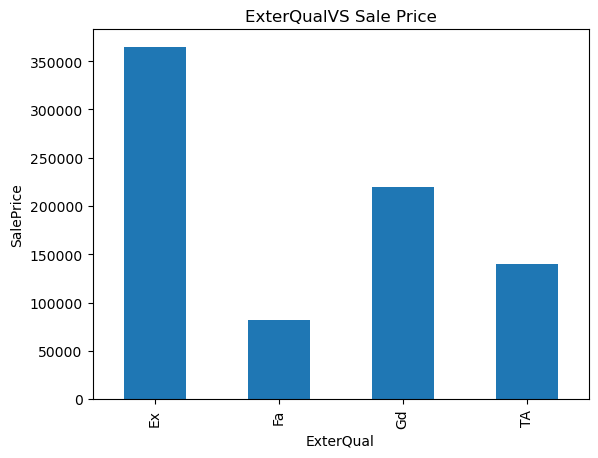

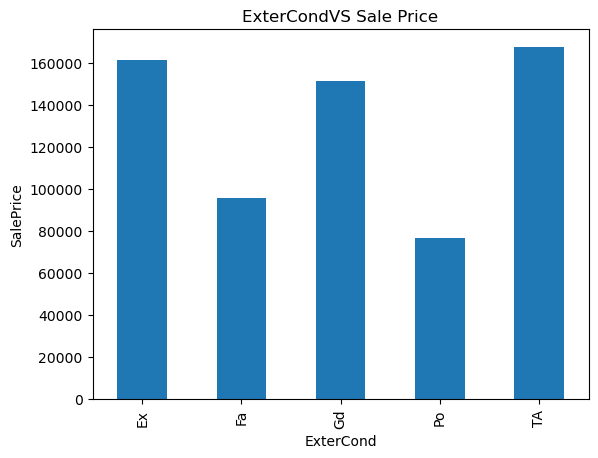

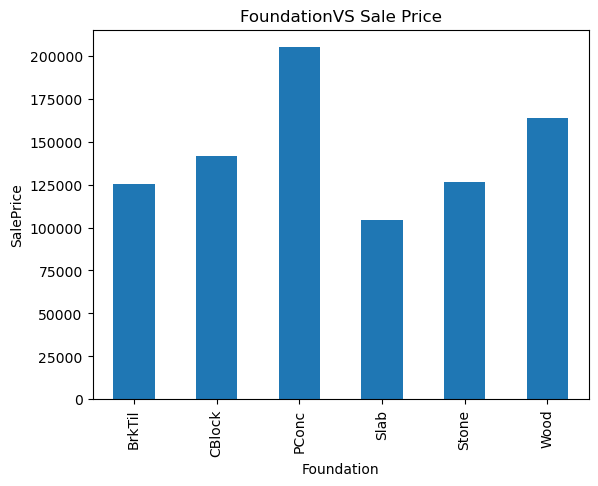

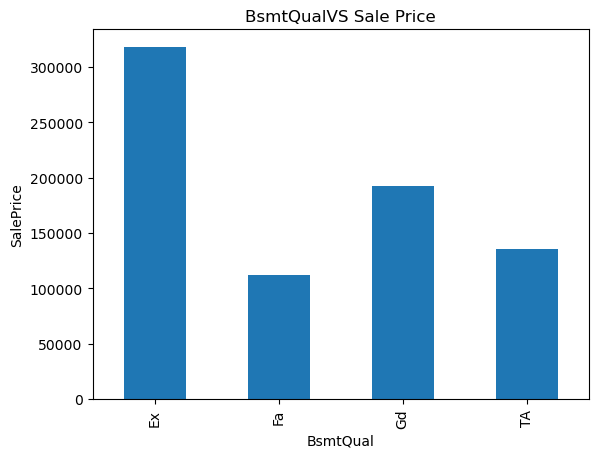

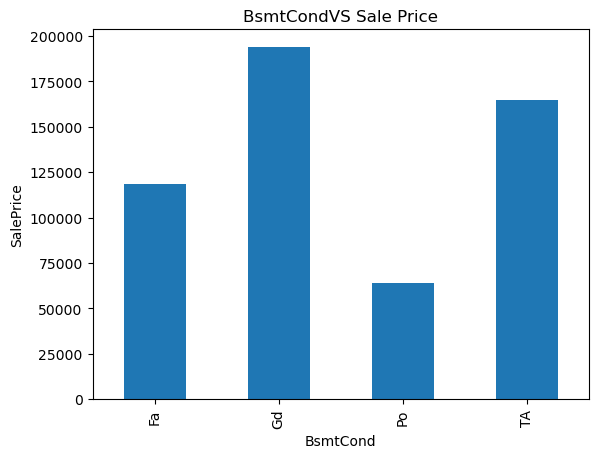

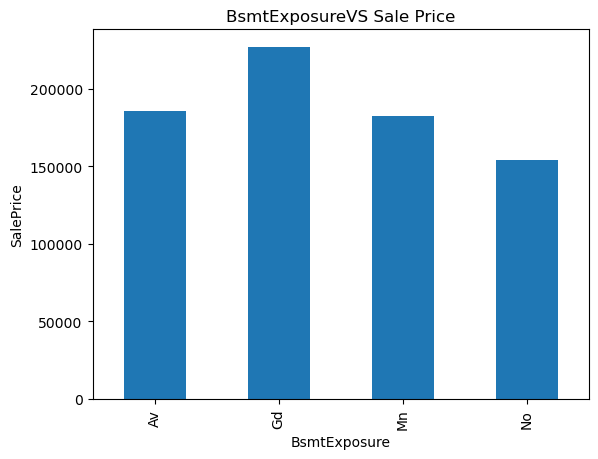

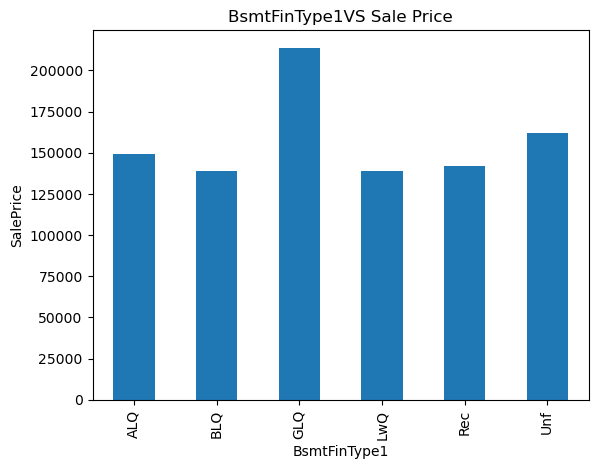

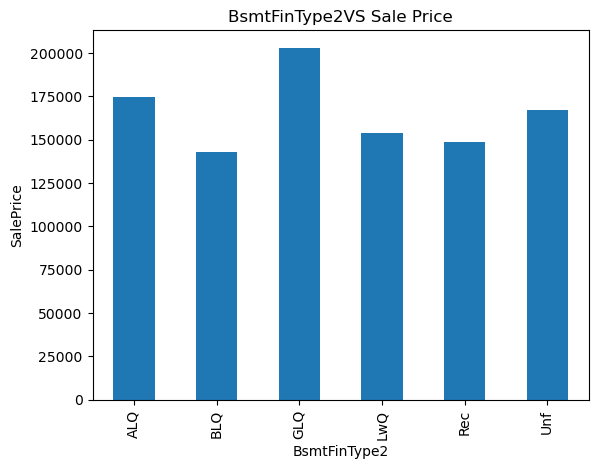

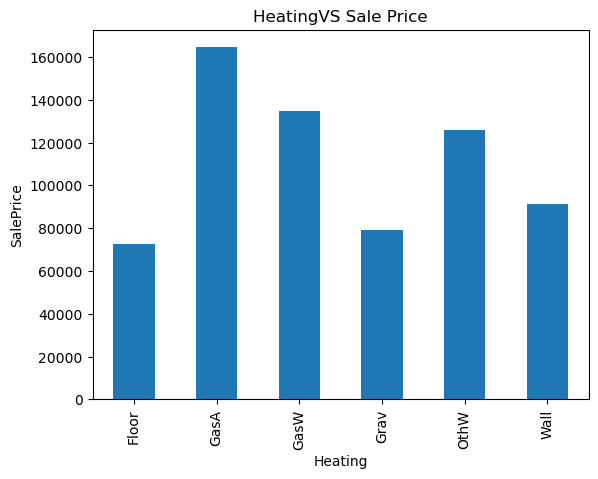

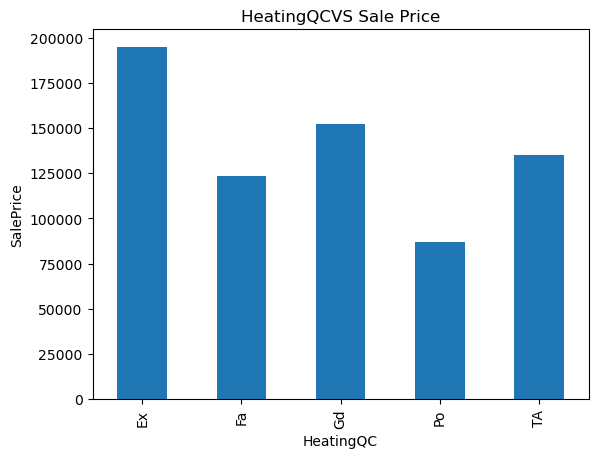

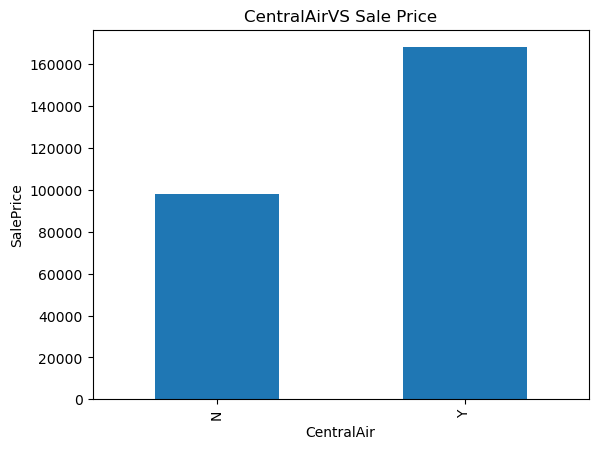

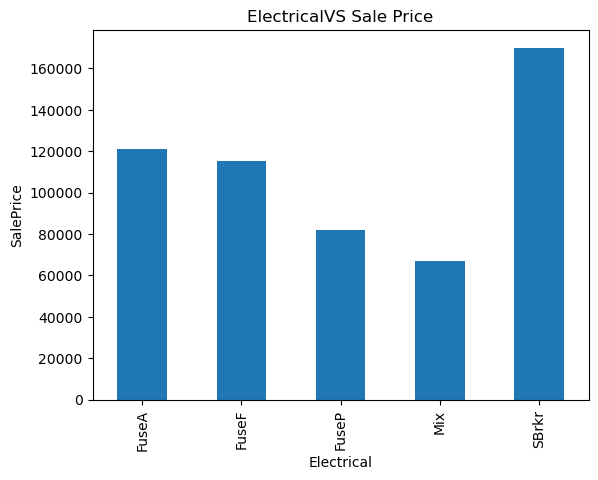

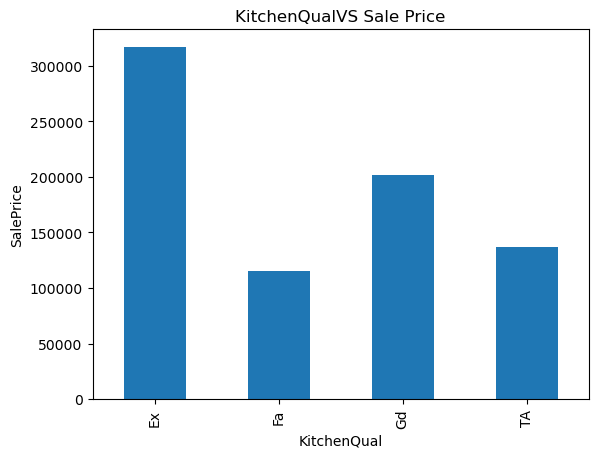

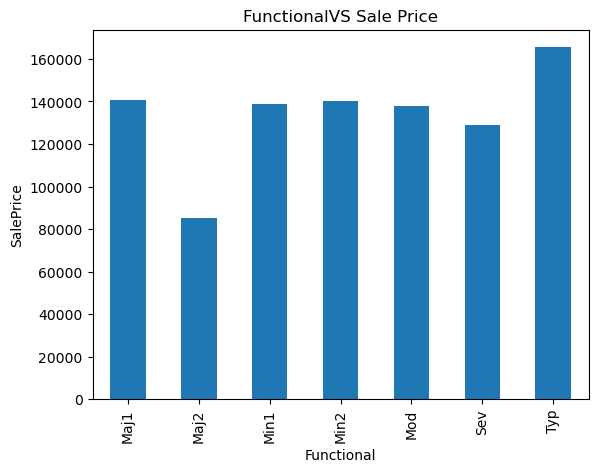

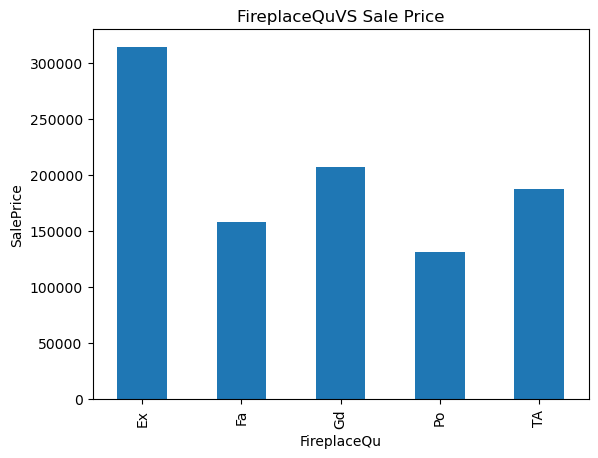

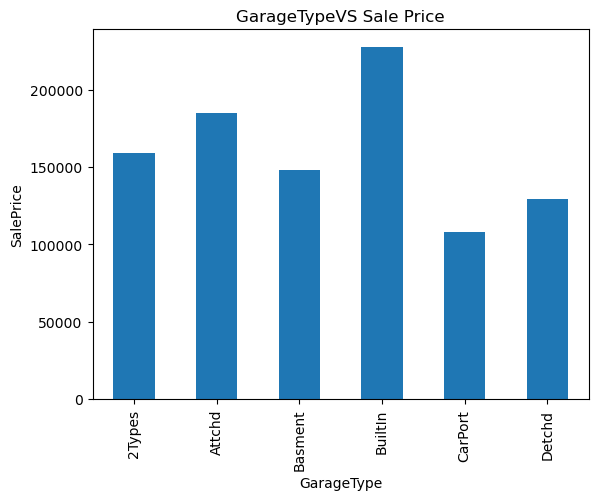

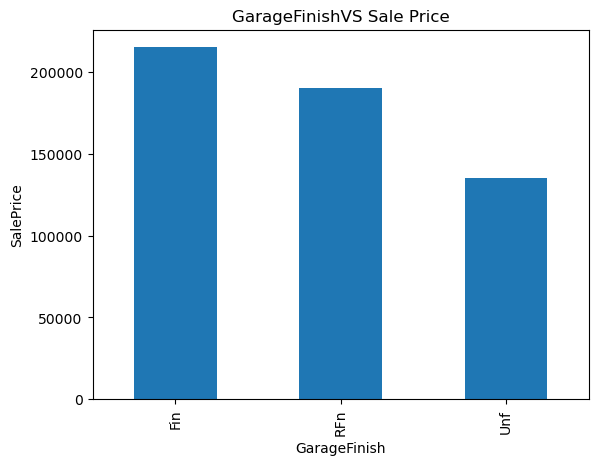

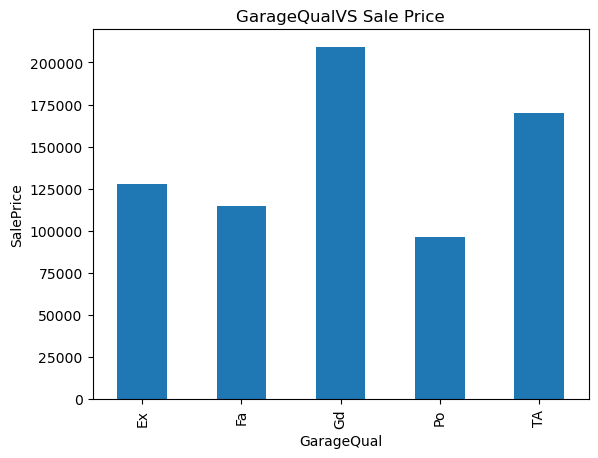

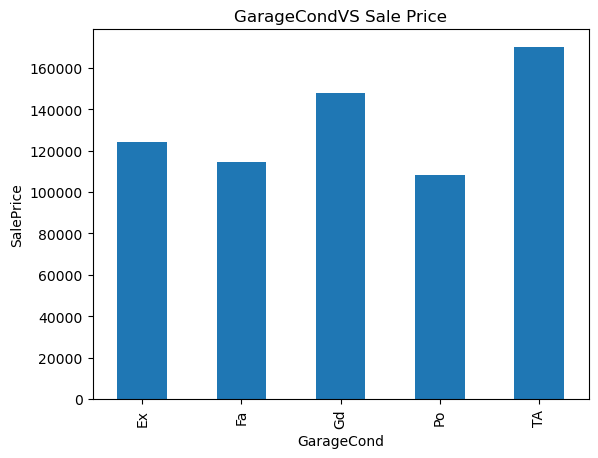

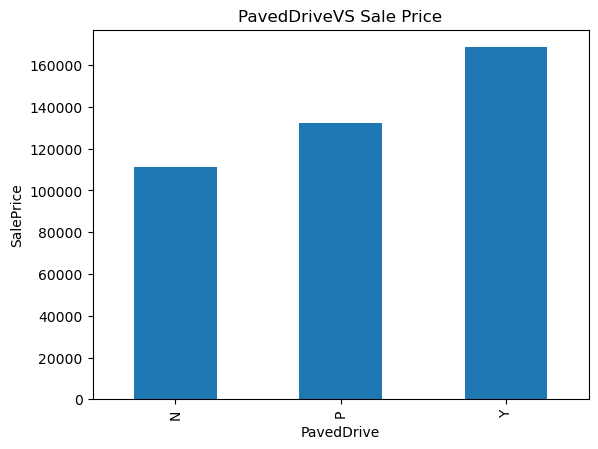

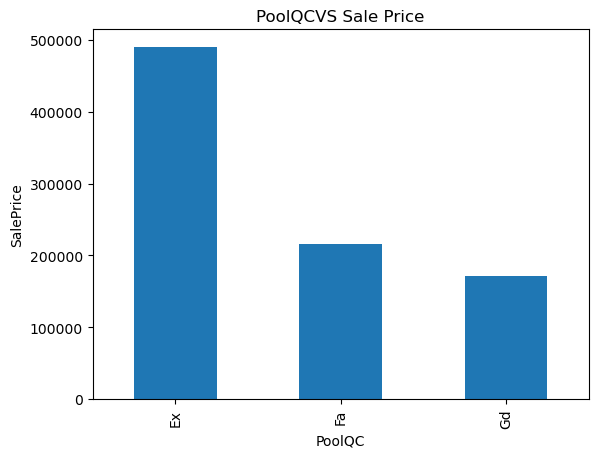

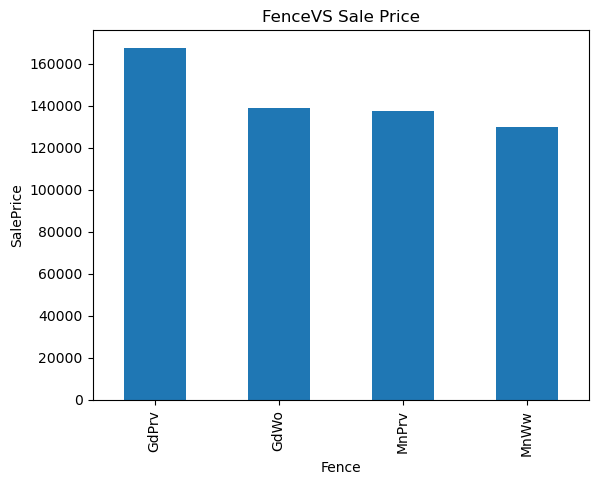

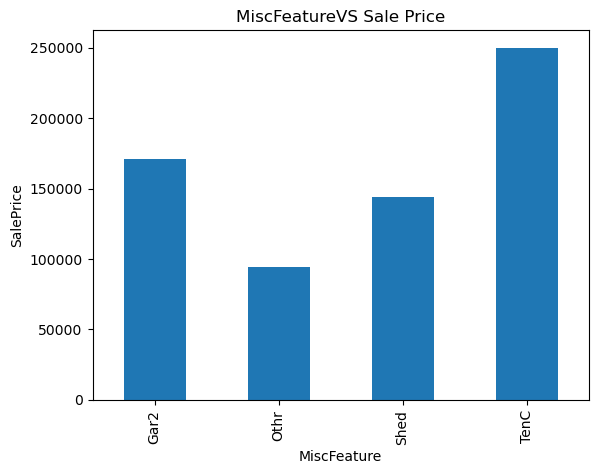

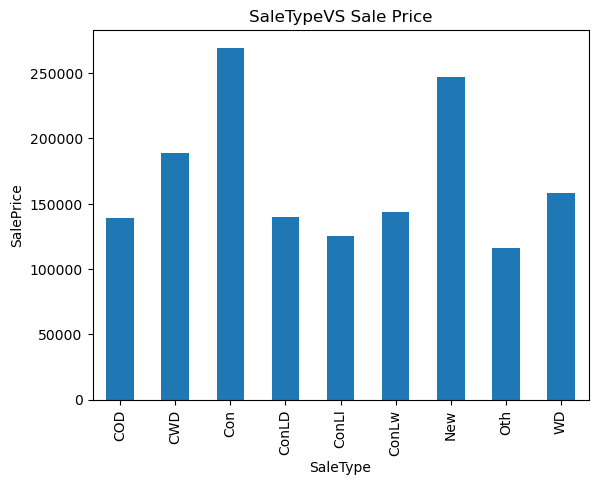

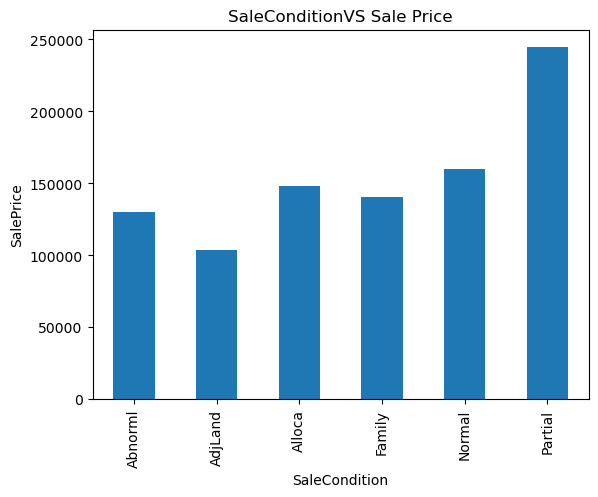

In [62]:
# Relatonship btw Categorical Features and target variable

for features in categorical_features:
    data6 = train_df.copy()
    data6.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features + 'VS Sale Price')
    plt.show()

    Conclude: These all make sense and none of them seems useless
                

 #

In [63]:
# Missing Values
# Number of features with missing values - Categorical features
categorical_features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1 and train_df[features].dtypes == 'O']
#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.1774 %
Alley = 0.9377 %
MasVnrType = 0.5973 %
MasVnrArea = 0.0055 %
BsmtQual = 0.0253 %
BsmtCond = 0.0253 %
BsmtExposure = 0.026 %
BsmtFinType1 = 0.0253 %
BsmtFinType2 = 0.026 %
FireplaceQu = 0.4726 %
GarageType = 0.0555 %
GarageYrBlt = 0.0555 %
GarageFinish = 0.0555 %
GarageQual = 0.0555 %
GarageCond = 0.0555 %
PoolQC = 0.9952 %
Fence = 0.8075 %
MiscFeature = 0.963 %


In [64]:
# Replace missing values with a new label 

def replace_cat_features(data, name_features):
    data7 = data.copy()
    data7[name_features] = data7[name_features].fillna('Mising')
    return data7

train_df = replace_cat_features(train_df,categorical_features_with_null_values)
train_df[features_with_null_values].isnull().sum()

LotFrontage     259
Alley             0
MasVnrType        0
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

In [65]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street   Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Mising      Reg   
1   2          20       RL         80.0     9600   Pave  Mising      Reg   
2   3          60       RL         68.0    11250   Pave  Mising      IR1   
3   4          70       RL         60.0     9550   Pave  Mising      IR1   
4   5          60       RL         84.0    14260   Pave  Mising      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd     Mising   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng     Mising   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0      Mising   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd

In [66]:
# Missing Values
# Number of features with missing values - Numerical Featres
numerical_features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1 and train_df[features].dtypes != 'O']
#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.1774 %
Alley = 0.0 %
MasVnrType = 0.0 %
MasVnrArea = 0.0055 %
BsmtQual = 0.0 %
BsmtCond = 0.0 %
BsmtExposure = 0.0 %
BsmtFinType1 = 0.0 %
BsmtFinType2 = 0.0 %
FireplaceQu = 0.0 %
GarageType = 0.0 %
GarageYrBlt = 0.0555 %
GarageFinish = 0.0 %
GarageQual = 0.0 %
GarageCond = 0.0 %
PoolQC = 0.0 %
Fence = 0.0 %
MiscFeature = 0.0 %


In [67]:
# Replace missing values with a median value or 1 or 0

for feature in numerical_features_with_null_values:
    #calculate median
    median_c = train_df[feature].median()
    
    #create new feature to capture nan values
    # if nan- replace it with 1
    # else - 0 
    train_df[feature +'nan'] = np.where(train_df[feature].isnull(),1,0)
    train_df[feature].fillna(median_c, inplace=True)

train_df[numerical_features_with_null_values].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [68]:
train_df.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street   Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Mising      Reg   
1    2          20       RL         80.0     9600   Pave  Mising      Reg   
2    3          60       RL         68.0    11250   Pave  Mising      IR1   
3    4          70       RL         60.0     9550   Pave  Mising      IR1   
4    5          60       RL         84.0    14260   Pave  Mising      IR1   
5    6          50       RL         85.0    14115   Pave  Mising      IR1   
6    7          20       RL         75.0    10084   Pave  Mising      Reg   
7    8          60       RL         69.0    10382   Pave  Mising      IR1   
8    9          50       RM         51.0     6120   Pave  Mising      Reg   
9   10         190       RL         50.0     7420   Pave  Mising      Reg   
10  11          20       RL         70.0    11200   Pave  Mising      Reg   
11  12          60       RL         85.0    11924   Pave  Mising      IR1   
12  13          20       RL         69.0    12968   Pave  Mising      IR2   
13  14          20       RL         91.0    10652   Pave  Mising      IR1   
14  15          20       RL         69.0    10920   Pave  Mising      IR1   
15  16          45       RM         51.0     6120   Pave  Mising      Reg   
16  17          20       RL         69.0    11241   Pave  Mising      IR1   
17  18          90       RL         72.0    10791   Pave  Mising      Reg   
18  19          20       RL         66.0    13695   Pave  Mising      Reg   
19  20          20       RL         70.0     7560   Pave  Mising      Reg   
20  21          60       RL        101.0    14215   Pave  Mising      IR1   
21  22          45       RM         57.0     7449   Pave    Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Mising      Reg   
23  24         120       RM         44.0     4224   Pave  Mising      Reg   
24  25          20       RL         69.0     8246   Pave  Mising      IR1   
25  26          20       RL        110.0    14230   Pave  Mising      Reg   
26  27          20       RL         60.0     7200   Pave  Mising      Reg   
27  28          20       RL         98.0    11478   Pave  Mising      Reg   
28  29          20       RL         47.0    16321   Pave  Mising      IR1   
29  30          30       RM         60.0     6324   Pave  Mising      IR1   
30  31          70  C (all)         50.0     8500   Pave    Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Mising      IR1   
32  33          20       RL         85.0    11049   Pave  Mising      Reg   
33  34          20       RL         70.0    10552   Pave  Mising      IR1   
34  35         120       RL         60.0     7313   Pave  Mising      Reg   
35  36          60       RL        108.0    13418   Pave  Mising      Reg   
36  37          20       RL        112.0    10859   Pave  Mising      Reg   
37  38          20       RL         74.0     8532   Pave  Mising      Reg   
38  39          20       RL         68.0     7922   Pave  Mising      Reg   
39  40          90       RL         65.0     6040   Pave  Mising      Reg   
40  41          20       RL         84.0     8658   Pave  Mising      Reg   
41  42          20       RL        115.0    16905   Pave  Mising      Reg   
42  43          85       RL         69.0     9180   Pave  Mising      IR1   
43  44          20       RL         69.0     9200   Pave  Mising      IR1   
44  45          20       RL         70.0     7945   Pave  Mising      Reg   
45  46         120       RL         61.0     7658   Pave  Mising      Reg   
46  47          50       RL         48.0    12822   Pave  Mising      IR1   
47  48          20       FV         84.0    11096   Pave  Mising      Reg   
48  49         190       RM         33.0     4456   Pave  Mising      Reg   
49  50          20       RL         66.0     7742   Pave  Mising      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0   

In [69]:
# Now lets check with DateTime variable 

for feature in year_features:
    train_df[feature] = train_df['YrSold'] - train_df[feature]

In [70]:
train_df[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5             5          5.0       0
1         31            31         31.0       0
2          7             6          7.0       0
3         91            36          8.0       0
4          8             8          8.0       0

In [71]:
## Log transformation for Numerical Features 
numerical_features_with_nonzero_values = [col for col in numerical_features if col != 'Id' and not (train_df[col] == 0).any()]
train_df[numerical_features_with_nonzero_values] = np.log(train_df[numerical_features_with_nonzero_values])
numerical_features_with_nonzero_values

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MoSold',
 'SalePrice']

In [72]:
train_df.head() 

Id  MSSubClass MSZoning  LotFrontage   LotArea Street   Alley LotShape  \
0   1    4.094345       RL     4.174387  9.041922   Pave  Mising      Reg   
1   2    2.995732       RL     4.382027  9.169518   Pave  Mising      Reg   
2   3    4.094345       RL     4.219508  9.328123   Pave  Mising      IR1   
3   4    4.248495       RL     4.094345  9.164296   Pave  Mising      IR1   
4   5    4.094345       RL     4.430817  9.565214   Pave  Mising      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     1.945910     1.609438          5   
1       Norm     1Fam     1Story     1.791759     2.079442         31   
2       Norm     1Fam     2Story     1.945910     1.609438          7   
3       Norm     1Fam     2Story     1.945910     1.609438         91   
4       Norm     1Fam     2Story     2.079442     1.609438          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd     Mising   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng     Mising   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd      2.079442        Typ           0      Mising   
1             1          TA      1.791759        Typ           1          TA   
2             1          Gd      1.791759        Typ           1          TA   
3             1      

In [73]:
# Handling rare categorical feature 
# removing cat. variables that are present less than 1% observation
for features in categorical_features:
    temp = train_df.groupby(features)['SalePrice'].count()/len(train_df)
    temp_df = temp[temp>0.01].index
    train_df[feature] = np.where(train_df[feature].isin(temp_df), train_df[feature], 'Rare_var')

In [74]:
train_df

Id  MSSubClass MSZoning  LotFrontage   LotArea Street   Alley  \
0        1    4.094345       RL     4.174387  9.041922   Pave  Mising   
1        2    2.995732       RL     4.382027  9.169518   Pave  Mising   
2        3    4.094345       RL     4.219508  9.328123   Pave  Mising   
3        4    4.248495       RL     4.094345  9.164296   Pave  Mising   
4        5    4.094345       RL     4.430817  9.565214   Pave  Mising   
...    ...         ...      ...          ...       ...    ...     ...   
1455  1456    4.094345       RL     4.127134  8.976768   Pave  Mising   
1456  1457    2.995732       RL     4.442651  9.486076   Pave  Mising   
1457  1458    4.248495       RL     4.189655  9.109636   Pave  Mising   
1458  1459    2.995732       RL     4.219508  9.181632   Pave  Mising   
1459  1460    2.995732       RL     4.317488  9.204020   Pave  Mising   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story     1.945910     1.609438   
1         Feedr       Norm     1Fam     1Story     1.791759     2.079442   
2          Norm       Norm     1Fam     2Story     1.945910     1.609438   
3          Norm       Norm     1Fam     2Story     1.945910     1.609438   
4          Norm       Norm     1Fam     2Story     2.079442     1.609438   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story     1.791759     1.609438   
1456       Norm       Norm     1Fam     1Story     1.791759     1.791759   
1457       Norm       Norm     1Fam     2Story     1.945910     2.197225   
1458       Norm       Norm     1Fam     1Story     1.609438     1.791759   
1459       Norm       Norm     1Fam     1Story     1.609438     1.791759   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0             5             5     Gable  CompShg     VinylSd     VinylSd   
1            31            31     Gable  CompShg     MetalSd     MetalSd   
2             7             6     Gable  CompShg     VinylSd     VinylSd   
3            91            36     Gable  CompShg     Wd Sdng     Wd Shng   
4             8             8     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455          8             7     Gable  CompShg     VinylSd     VinylSd   
1456         32            22     Gable  CompShg     Plywood     Plywood   
1457         69             4     Gable  CompShg     CemntBd     CmentBd   
1458         60            14       Hip  CompShg     MetalSd     MetalSd   
1459         43            43     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1        Mising         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3        Mising         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd   

In [75]:
# Feature Scalling Uing MinMaxScaler for Numerical Features

# Step 1: Store 'Id' and 'SalePrice' columns separately
id_column = train_df['Id']
sale_price_column = train_df['SalePrice']

# Step 2: Identify numerical columns
numerical_cols = train_df.select_dtypes(include=['int', 'float']).columns

# Remove 'Id' and 'SalePrice' from numerical columns
numerical_cols = numerical_cols.drop(['Id', 'SalePrice'])

# Step 3: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 4: Fit the scaler to the numerical data
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Step 5: Concatenate the scaled numerical columns with 'Id' and 'SalePrice'
train_df_scaled = pd.concat([id_column, train_df[numerical_cols], sale_price_column], axis=1)

# Now train_df_scaled contains the scaled numerical columns along with 'Id' and 'SalePrice'


In [76]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street   Alley LotShape  \
0   1    0.487992       RL     0.418208  0.366344   Pave  Mising      Reg   
1   2    0.000000       RL     0.495064  0.391317   Pave  Mising      Reg   
2   3    0.487992       RL     0.434909  0.422359   Pave  Mising      IR1   
3   4    0.556464       RL     0.388581  0.390295   Pave  Mising      IR1   
4   5    0.487992       RL     0.513123  0.468761   Pave  Mising      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     0.845098     0.732487   0.036765   
1       Norm     1Fam     1Story     0.778151     0.946395   0.227941   
2       Norm     1Fam     2Story     0.845098     0.732487   0.051471   
3       Norm     1Fam     2Story     0.845098     0.732487   0.669118   
4       Norm     1Fam     2Story     0.903090     0.732487   0.058824   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      0.098361     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      0.524590     Gable  CompShg     MetalSd     MetalSd     Mising   
2      0.114754     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      0.606557     Gable  CompShg     Wd Sdng     Wd Shng     Mising   
4      0.147541     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     0.12250        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2     0.10125        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4     0.21875        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    0.125089          Unf         0.0   0.064212     0.140098   
1          ALQ    0.173281          Unf         0.0   0.121575     0.206547   
2          GLQ    0.086109          Unf         0.0   0.185788     0.150573   
3          ALQ    0.038271          Unf         0.0   0.231164     0.123732   
4          GLQ    0.116052          Unf         0.0   0.209760     0.187398   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  0.356155  0.413559           0.0   
1    GasA        Ex          Y      SBrkr  0.503056  0.000000           0.0   
2    GasA        Ex          Y      SBrkr  0.383441  0.419370           0.0   
3    GasA        Gd          Y      SBrkr  0.399941  0.366102           0.0   
4    GasA        Ex          Y      SBrkr  0.466237  0.509927           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.577712      0.333333           0.0  0.666667       0.5         0.375   
1   0.470245      0.000000           0.5  0.666667       0.0         0.375   
2   0.593095      0.333333           0.0  0.666667       0.5         0.375   
3   0.579157      0.333333           0.0  0.333333       0.0         0.375   
4   0.666523      0.333333           0.0  0.666667       0.5         0.500   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0      0.333333          Gd      0.712414        Typ    0.000000      Mising   
1      0.333333          TA      0.564575        Typ    0.333333          TA   
2      0.333333          Gd      0.564575        Typ    0.333333          TA   
3      0.333333      

In [77]:
# For Categorical Features we have 
# 1- One-Hot Encoding - less unique feature < 5 
# 2 - Label Encoding  - if there is an order 
# 3 - Frequency Encoding - remaining
# Lets decide, which encoding is best for what column 
train_df[categorical_features].head(50)

for features in categorical_features:
    print(features, "Unique Values = ", train_df[features].unique())
    print('\n')

MSZoning Unique Values =  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Street Unique Values =  ['Pave' 'Grvl']


Alley Unique Values =  ['Mising' 'Grvl' 'Pave']


LotShape Unique Values =  ['Reg' 'IR1' 'IR2' 'IR3']


LandContour Unique Values =  ['Lvl' 'Bnk' 'Low' 'HLS']


Utilities Unique Values =  ['AllPub' 'NoSeWa']


LotConfig Unique Values =  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope Unique Values =  ['Gtl' 'Mod' 'Sev']


Neighborhood Unique Values =  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1 Unique Values =  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2 Unique Values =  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType Unique Values =  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle Unique Values =  [

In [78]:
# Calculate the average number of unique values in categorical features to choose One Hot Encoding range
average_unique_values = sum(len(set(train_df[feature])) for feature in categorical_features) / len(categorical_features)

print("Average number of unique values in categorical features:", average_unique_values)


Average number of unique values in categorical features: 6.209302325581396


In [79]:
# One-Hot-Encoding for categorical values 

# Filter categorical columns with unique values < 6
one_hot_encoding_cols = [col for col in categorical_features if len(train_df[col].unique()) < 6]

if one_hot_encoding_cols:
    one_hot_encoded_df = pd.get_dummies(train_df, columns=one_hot_encoding_cols)

    # Drop the original categorical columns
    train_df.drop(columns=one_hot_encoding_cols, inplace=True)

    # Concatenate one-hot encoded -> original DataFrame
    train_df = pd.concat([train_df, one_hot_encoded_df], axis=1)
else:
    print("No columns for one-hot encoding found.")

train_df = train_df.loc[:,~train_df.columns.duplicated()]
train_df.head()


Id  MSSubClass  LotFrontage   LotArea Neighborhood Condition1 Condition2  \
0   1    0.487992     0.418208  0.366344      CollgCr       Norm       Norm   
1   2    0.000000     0.495064  0.391317      Veenker      Feedr       Norm   
2   3    0.487992     0.434909  0.422359      CollgCr       Norm       Norm   
3   4    0.556464     0.388581  0.390295      Crawfor       Norm       Norm   
4   5    0.487992     0.513123  0.468761      NoRidge       Norm       Norm   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story     0.845098     0.732487   0.036765      0.098361     Gable   
1     1Story     0.778151     0.946395   0.227941      0.524590     Gable   
2     2Story     0.845098     0.732487   0.051471      0.114754     Gable   
3     2Story     0.845098     0.732487   0.669118      0.606557     Gable   
4     2Story     0.903090     0.732487   0.058824      0.147541     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea Foundation BsmtFinType1  \
0  CompShg     VinylSd     VinylSd     0.12250      PConc          GLQ   
1  CompShg     MetalSd     MetalSd     0.00000     CBlock          ALQ   
2  CompShg     VinylSd     VinylSd     0.10125      PConc          GLQ   
3  CompShg     Wd Sdng     Wd Shng     0.00000     BrkTil          ALQ   
4  CompShg     VinylSd     VinylSd     0.21875      PConc          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0    0.125089          Unf         0.0   0.064212     0.140098    GasA   
1    0.173281          Unf         0.0   0.121575     0.206547    GasA   
2    0.086109          Unf         0.0   0.185788     0.150573    GasA   
3    0.038271          Unf         0.0   0.231164     0.123732    GasA   
4    0.116052          Unf         0.0   0.209760     0.187398    GasA   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr  0.356155  0.413559           0.0   0.577712      0.333333   
1      SBrkr  0.503056  0.000000           0.0   0.470245      0.000000   
2      SBrkr  0.383441  0.419370           0.0   0.593095      0.333333   
3      SBrkr  0.399941  0.366102           0.0   0.579157      0.333333   
4      SBrkr  0.466237  0.509927           0.0   0.666523      0.333333   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0  0.666667       0.5         0.375      0.333333      0.712414   
1           0.5  0.666667       0.0         0.375      0.333333      0.564575   
2           0.0  0.666667       0.5         0.375      0.333333      0.564575   
3           0.0  0.333333       0.0         0.375      0.333333      0.643793   
4           0.0  0.666667       0.5         0.500      0.333333      0.772943   

  Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  GarageCars  \
0        Typ    0.000000      Mising     Attchd     0.046729        0.50   
1        Typ    0.333333          TA     Attchd     0.289720        0.50   
2        Typ    0.333333          TA     Attchd     0.065421        0.50   
3        Typ    0.333333          Gd     Detchd     0.074766        0.75   
4        Typ    0.333333          TA     Attchd     0.074766        0.75   

   GarageArea GarageQual GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0    0.386460         TA         TA    0.000000     0.111517       0.000000   
1    0.324401         TA         TA    0.347725     0.000000       0.000000   
2    0.428773         TA         TA    0.000000     0.076782       0.000000   
3    0.452750         TA         TA    0.000000     0.063985       0.492754   
4    0.589563         TA         TA    0.224037     0.153565       0.000000   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold    YrSold SaleType  \
0        0.0          0.0       0.0      0.0  0.278943  Rare_var       WD   
1        0.0          0.0       0.0      0.0  0.647685  Rare_var       WD   
2        0.0          0.0       0.0      0.0  0.884228  Rare_var       WD 

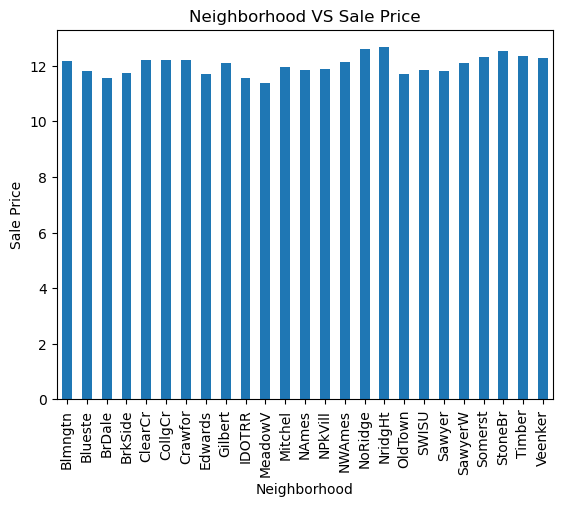

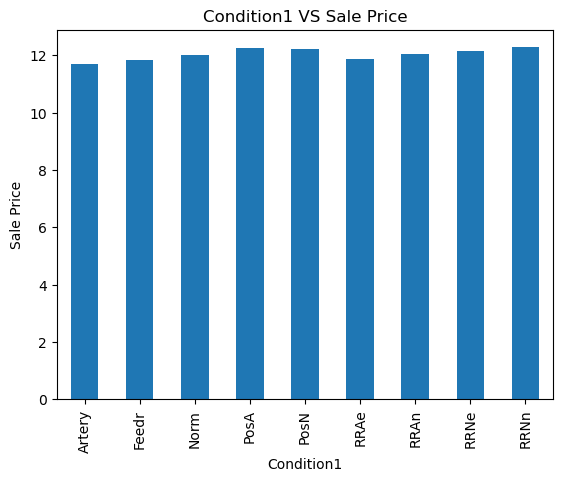

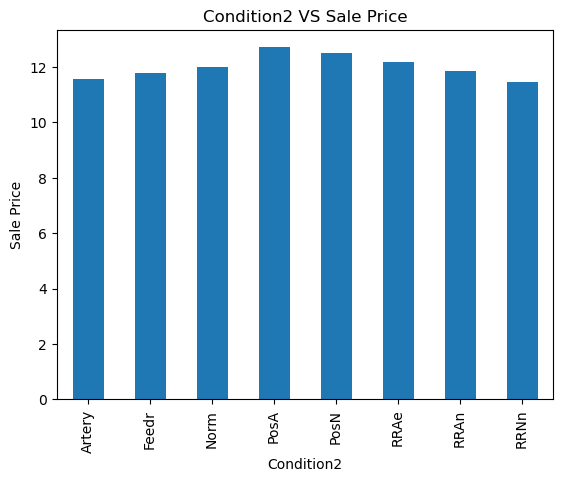

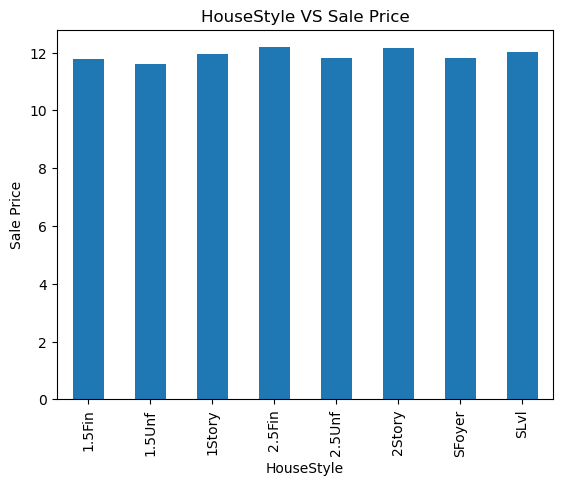

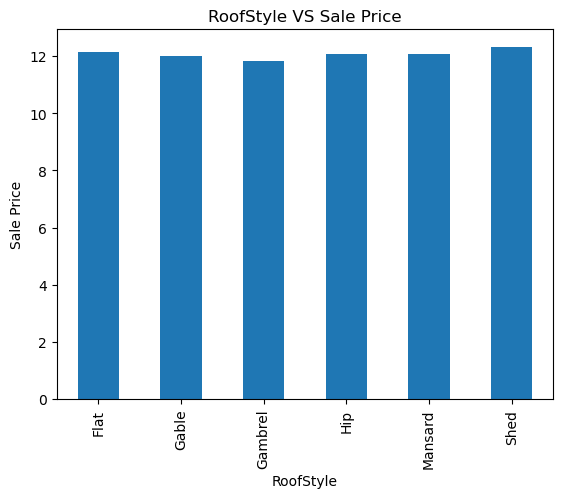

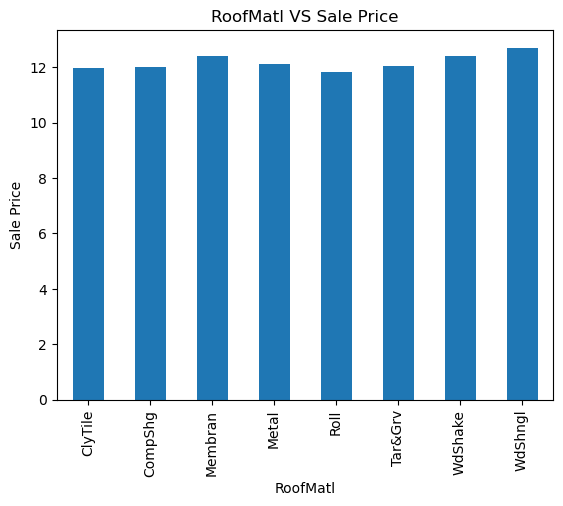

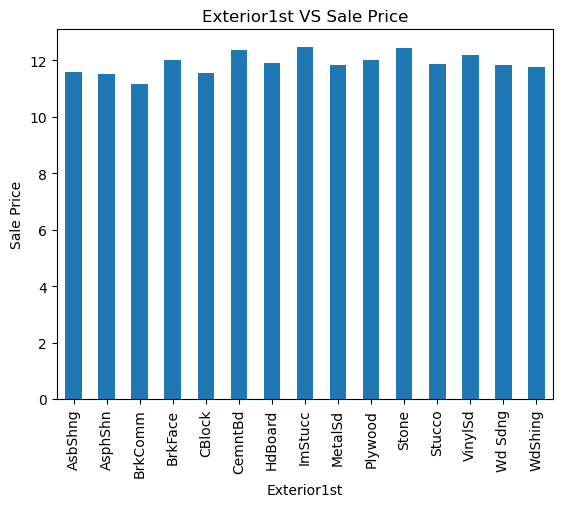

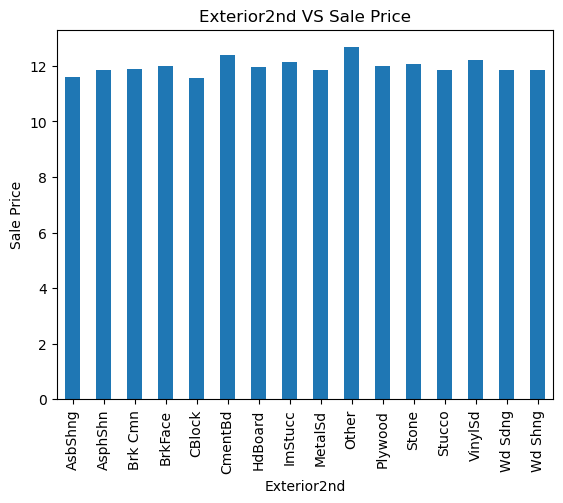

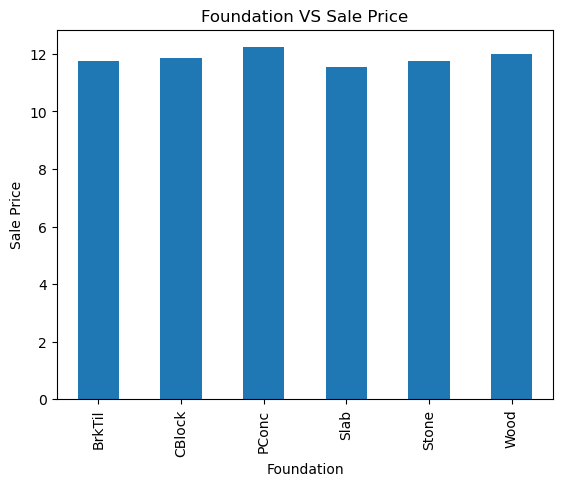

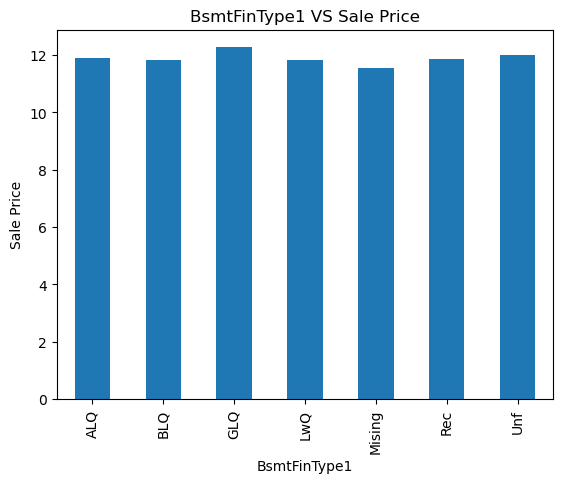

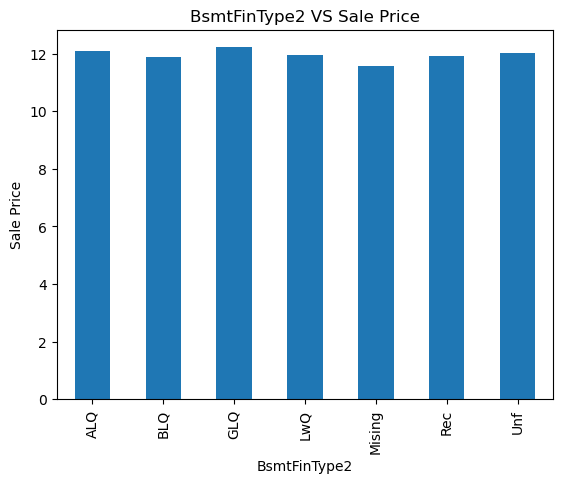

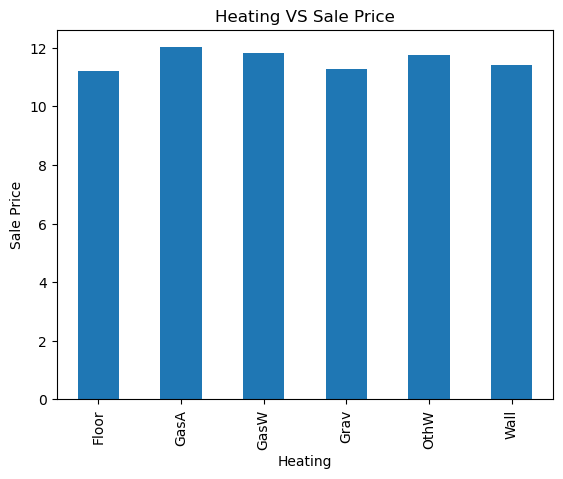

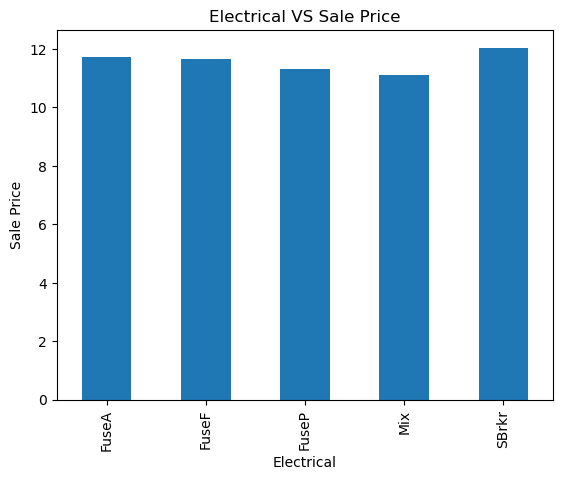

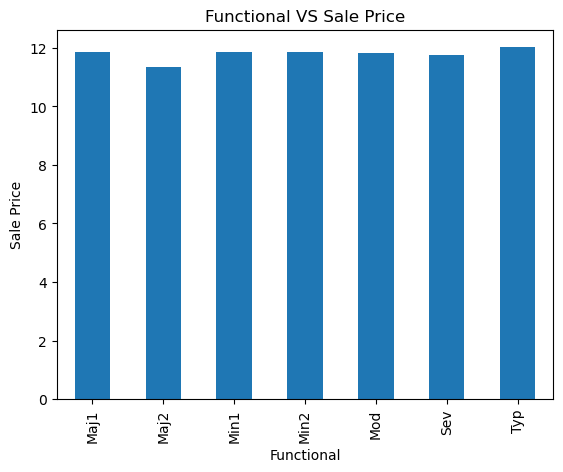

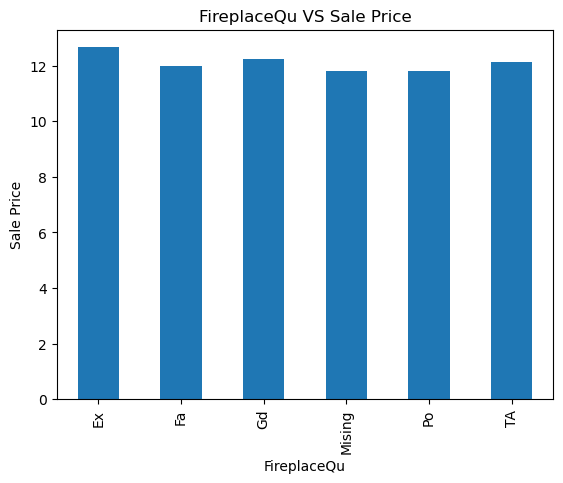

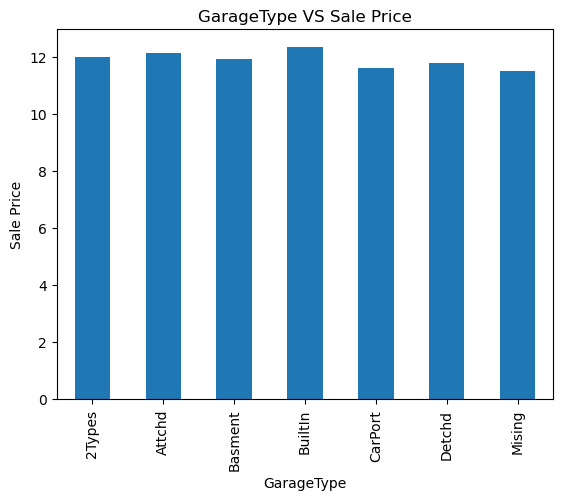

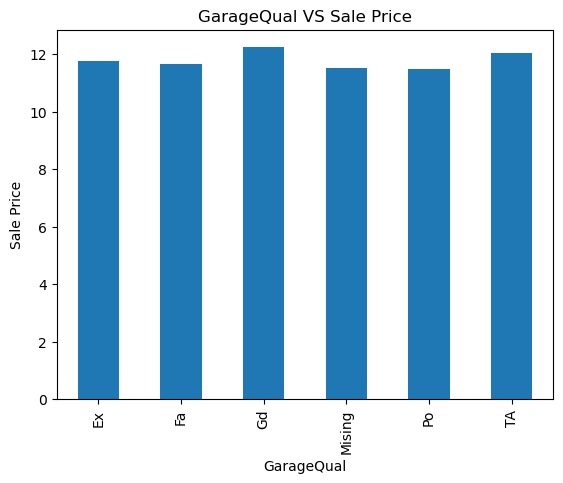

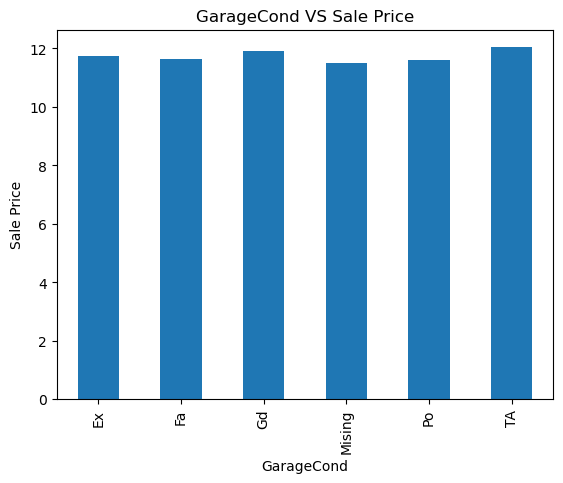

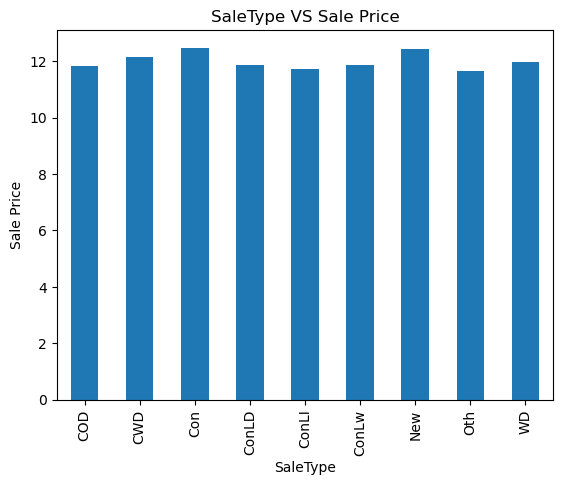

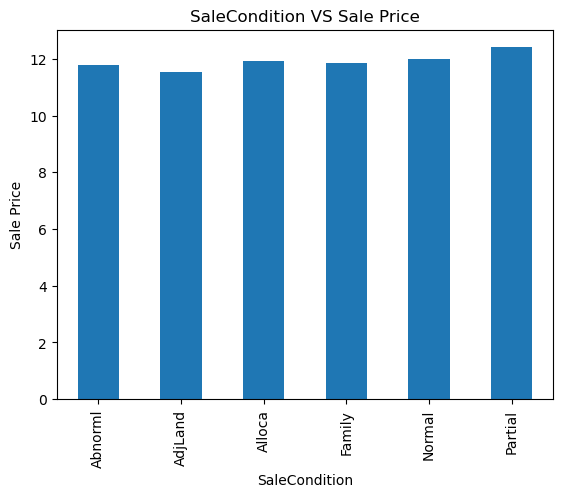

In [80]:
# Label Encoding to remaining ones
label_encoding_cols = [col for col in categorical_features if col not in one_hot_encoding_cols]
for col in label_encoding_cols:
    data8 = train_df.copy()
    data8.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.title(col + ' VS Sale Price')
    plt.show()

    Conclude: After visualizing these, there is no sign of showing any upper or lower directed trend. 

#

In [81]:
# Drop the cols from the train_df as it has nothiin to do with sales price
train_df.drop(columns = label_encoding_cols , inplace= True)

In [82]:
final_categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

In [83]:
# Splitting Model 
X = train_df.drop(columns=['SalePrice'])  # Features
y = train_df['SalePrice']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Algorithms (SVM, Linear Regression, Random Forest)
svm_model = SVR()
linear_model = LinearRegression()
rf_model = RandomForestRegressor()


In [85]:
# Step 1: Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_categorical = X_train[final_categorical_features]
X_test_categorical = X_test[final_categorical_features]

X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

# Step 2: Separate numerical features from categorical features
numerical_features = X_train.select_dtypes(include=['int', 'float']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Step 3: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Step 4: Concatenate encoded categorical features with scaled numerical features
X_train_final = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
X_test_final = np.concatenate([X_test_encoded, X_test_scaled], axis=1)

# Step 5: Train SVM model
svm_model = SVR()
linear_model = LinearRegression()
rf_model = RandomForestRegressor()

svm_model.fit(X_train_final, y_train)
rf_model.fit(X_train_final, y_train)  # Fit Random Forest with encoded features
linear_model.fit(X_train_final, y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LinearRegression()

In [86]:
# Step 4: Evaluate Performance with RMSE
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Step 4: Evaluate models with test data
svm_rmse = evaluate_model(svm_model, X_test_final, y_test)
linear_rmse = evaluate_model(linear_model, X_test_final, y_test)
rf_rmse = evaluate_model(rf_model, X_test_final, y_test)

print("SVM RMSE:", svm_rmse)
print("Linear Regression RMSE:", linear_rmse)
print("Random Forest RMSE:", rf_rmse)

SVM RMSE: 0.17239564324006748
Linear Regression RMSE: 0.14398554453019166
Random Forest RMSE: 0.14989742118841215


#

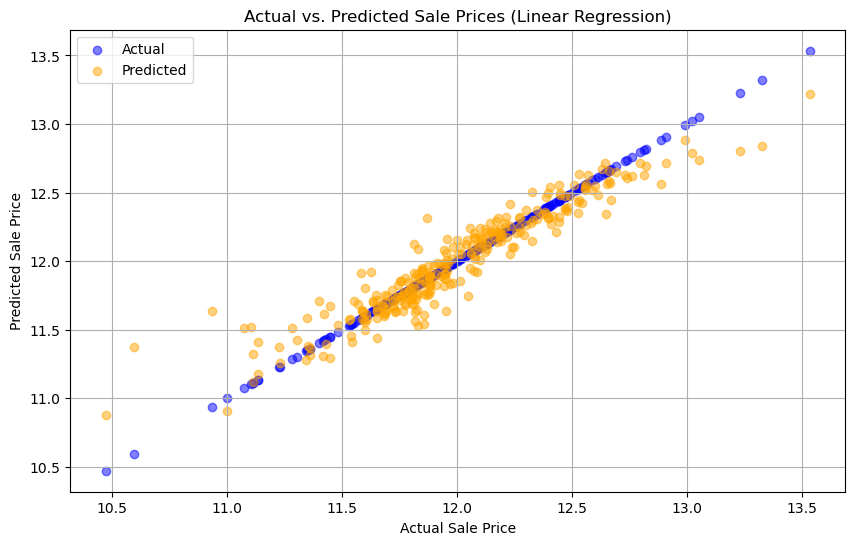

In [89]:
# Plotting 
y_pred_linear = linear_model.predict(X_test_final)

# Plot actual vs. predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Plot the diagonal line (actual vs actual)
plt.scatter(y_test, y_pred_linear, color='orange', label='Predicted', alpha=0.5)  # Plot predicted vs actual
plt.title('Actual vs. Predicted Sale Prices (Linear Regression)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid(True)
plt.show()

#

## Testing Data

In [90]:
test_df = pd.read_csv("/Users/krushna/Downloads/house-prices-advanced-regression-techniques-2/test.csv")

In [134]:
# Missing Values and Handling 


# Missing Values - Total Dataset
# Number of features with missing values 
features_with_null_values_test =  [features for features in test_df.columns if test_df[features].isnull().sum() > 1]
print("Percentage of values in the missing features in Total Dataset")
#percentage of values in the missing features 
for feature in features_with_null_values_test:
    print(feature, "=",np.round(test_df[feature].isnull().mean() , 4), '%' )
    


# Numerical Variables 
numerical_features_test = [features for features in test_df.columns if test_df[features].dtypes != 'O']
print("\nNumerical Features in test Dataset= " ,len(numerical_features_test))
print( "\nNumerical Features in test Dataset" , numerical_features_test,"\n")



# Date Time Variables
year_features_test = [features for features in numerical_features_test if 'Yr' in features or 'Year'in features]
print("\nYear Features in test Dataset = " ,len(year_features_test))
print( "\nYear Features in test Dataset " , year_features_test,"\n")


# Numerical Feature 
# Two Types: Discrete and Continous 
# Lets check how discrete make a change to Sales Price
descrete_features_test = [features for features in numerical_features_test if len(test_df[features].unique())<25 and features not in year_features_test +['Id']]
print("\nTotal descrete_features in test dataset: " , len(descrete_features_test))



# Continous Varibale 
continous_feature_test = [features for features in numerical_features_test if features not in descrete_features_test + year_features_test +['id']]
print("\nTotal continous_features in test Dataset: " , len(continous_feature_test))



# Categorical Features
categorical_features_test = [features for features in test_df.columns if test_df[features].dtypes == 'O']
print("\nCategorical  Features in test Dataset= " ,len(categorical_features_test))
print( "\n Categoical Features in test Dataset" , categorical_features_test ,"\n")


# Missing Values
# Number of features with missing values - Categorical features
categorical_features_with_null_values_test =  [features for features in test_df.columns if test_df[features].isnull().sum() > 1 and test_df[features].dtypes == 'O']
#percentage of values in the missing features 
print("Percentage of values in the Missing Features- Categorical")
for feature in categorical_features_with_null_values_test:
    print(feature, "=",np.round(test_df[feature].isnull().mean() , 4), '%' )
    
    
# Replace missing values with a new label 
def replace_cat_features_test(data, name_features):
    data7 = data.copy()
    data7[name_features] = data7[name_features].fillna('Mising')
    return data7

test_df = replace_cat_features_test(test_df,categorical_features_with_null_values_test)
print("\n Updated Features with Null Values in Test Dataset")
print(test_df[categorical_features_with_null_values_test].isnull().sum())


# Missing Values
# Number of features with missing values - Numerical Featres
numerical_features_with_null_values_test =  [features for features in test_df.columns if test_df[features].isnull().sum() > 1 and test_df[features].dtypes != 'O']
#percentage of values in the missing features
print("\nNumerical Features with Null Values in Test Dataset")
for feature in numerical_features_with_null_values_test:
    print(feature, "=",np.round(test_df[feature].isnull().mean() , 4), '%' )

    
# Replace missing values with a median value or 1 or 0
for feature in numerical_features_with_null_values_test:
    #calculate median
    median_c = test_df[feature].median()
    
    #create new feature to capture nan values
    # if nan- replace it with 1
    # else - 0 
    test_df[feature +'nan'] = np.where(test_df[feature].isnull(),1,0)
    test_df[feature].fillna(median_c, inplace=True)
print("\nFeature Eng Numerical Values")
print(test_df[numerical_features_with_null_values_test].isnull().sum())

Percentage of values in the missing features in Total Dataset

Numerical Features in test Dataset=  42

Numerical Features in test Dataset ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontagenan', 'MasVnrAreanan', 'BsmtFullBathnan', 'BsmtHalfBathnan', 'GarageYrBltnan'] 


Year Features in test Dataset =  5

Year Features in test Dataset  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan'] 


Total descrete_features in test dataset:  20

Total continous_features in test Dataset:  17

Categorical  Features in